In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/Thesis/Processing"
!pip install --upgrade librosa
!pip install dtw-python
!ls
import librosa
import numpy as np
import matplotlib.pyplot as plt

/content/drive/My Drive/Thesis/Processing
Requirement already up-to-date: librosa in /usr/local/lib/python3.7/dist-packages (0.8.0)
BoxPlotSource2.csv
EDIT-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
EDIT-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
EDIT-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
Plots
PROD-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
PROD-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
PROD-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
RLAB-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
RLAB-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav
RLAB-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav


In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
def shift_to_zero(array,mode='avg'):
    array = np.asarray(array)
    if mode=='avg':
      average=np.average(array);
      array=array-average
    if mode=='median':
      median=np.median(array);
      array=array-median
    return array

In [5]:
def filter_response(array):
    #4 is safe for removing jigglies in average
    from scipy.signal import savgol_filter as savitzky_golay
    mode='run_avg';
    if mode=='golay': 
      array = np.asarray(array)
      array = savitzky_golay(array, 51, 3)
    if mode=='run_avg':
      points=4;
      box_pts=len(array)//points;
      box = np.ones(box_pts)/box_pts
      array = np.convolve(array, box, mode='same')
    return array

In [6]:
def plot_IR(modIR,title):
    import librosa
    import scipy
    import matplotlib.pyplot as plt
    from scipy.signal import savgol_filter as savitzky_golay
    """ Plot the frequencies and magnitudes of an audio signal
 
    Parameters
    ----------
    x: np.array
        audio samples
    
    fs: int
        sample rate
    
    Returns
    -------
    none
    
    """
    freq_min=20
    freq_max=22050
    n_fft=2048
    mono=False;
    
    y, sr = librosa.load(modIR,sr=None,mono=False)
    stft_L=librosa.stft(y[0], n_fft)
    y_axis_L=np.abs(np.sum(stft_L,axis=1))
    y_axis_L=librosa.core.amplitude_to_db(y_axis_L)
    y_axis_L = filter_response(y_axis_L)
    y_axis_L = shift_to_zero(y_axis_L);
 
    stft_R=librosa.stft(y[1], n_fft)
    y_axis_R=np.abs(np.sum(stft_R,axis=1))
    y_axis_R=librosa.core.amplitude_to_db(y_axis_R)
    y_axis_R = filter_response(y_axis_R)
    y_axis_R = shift_to_zero(y_axis_R)
 
    x_axis=librosa.fft_frequencies(sr, n_fft)
    x_min=find_nearest(x_axis,freq_min);
    x_max=find_nearest(x_axis,freq_max);
    x_axis=x_axis[x_min:x_max]
 
 
    y_axis=np.vstack((y_axis_L[x_min:x_max],y_axis_R[x_min:x_max])).T
    
    plt.figure(figsize=(60,30))
    if mono==False:
      plt.plot(x_axis,y_axis)
      plt.legend(['Left', 'Right'],prop={'size': 35});
      plt.title(title,fontweight="bold", size=50)
      plt.ylabel('Level (dB)',fontsize = 50.0)
      plt.xlabel('Frequency (hz)',fontsize = 50.0)
      plt.tick_params(axis='both', which='major', labelsize=35)
      outfile="Plots/IRs/" + title + ".png"
      #plt.yticks(np.arange(-20, 20, 2))
      plt.xticks(np.arange(0, 22050, 2000))
      plt.savefig(outfile,dpi=400)
      plt.show()
 
    else:
      y_axis=np.average(y_axis,axis=1)
      plt.plot(x_axis,y_axis)
      plt.title(title,fontweight="bold", size=50)
      plt.ylabel('Level (dB)',fontsize = 50.0)
      plt.xlabel('Frequency (hz)',fontsize = 50.0)
      plt.tick_params(axis='both', which='major', labelsize=35)
      #plt.yticks(np.arange(-20, 20, 2))
      plt.xticks(np.arange(0, 22050, 2000))
      outfile="Plots/IRs/" + title + ".png"
      plt.savefig(outfile,dpi=400)
      plt.show()

In [7]:
def plot_dIR(modIR,normalIR,title):
    import librosa
    import scipy
    import matplotlib.pyplot as plt
    """ Plot the frequencies and magnitudes of an audio signal
 
    Parameters
    ----------
    x: np.array
        audio samples
    
    fs: int
        sample rate
    
    Returns
    -------
    none
    
    """
    freq_min=20
    freq_max=22050
    sr=48000
    n_fft=2048
    mono=True;
    
    y1, sr1 = librosa.load(modIR,sr=None,mono=False)
    stft1_L=librosa.stft(y1[0], n_fft)
    y_axis1_L=np.abs(np.sum(stft1_L,axis=1))
    y_axis1_L=librosa.core.amplitude_to_db(y_axis1_L)
    y_axis1_L = filter_response(y_axis1_L)
    y_axis1_L=shift_to_zero(y_axis1_L)
 
    stft1_R=librosa.stft(y1[1], n_fft)
    y_axis1_R=np.abs(np.sum(stft1_R,axis=1))
    y_axis1_R=librosa.core.amplitude_to_db(y_axis1_R)
    y_axis1_R = filter_response(y_axis1_R)
    y_axis1_R=shift_to_zero(y_axis1_R)
 
    y2, sr2 = librosa.load(normalIR,sr=None,mono=False)
    stft2_L=librosa.stft(y2[0], n_fft)
    y_axis2_L=np.abs(np.sum(stft2_L,axis=1))
    y_axis2_L=librosa.core.amplitude_to_db(y_axis2_L)
    y_axis2_L = filter_response(y_axis2_L)
    y_axis2_L=shift_to_zero(y_axis2_L)
 
    stft2_R=librosa.stft(y2[1], n_fft)
    y_axis2_R=np.abs(np.sum(stft2_R,axis=1))
    y_axis2_R=librosa.core.amplitude_to_db(y_axis2_R)
    y_axis2_R = filter_response(y_axis2_R)
    y_axis2_R=shift_to_zero(y_axis2_R)
 
    x_axis=librosa.fft_frequencies(sr, n_fft)
    x_min=find_nearest(x_axis,freq_min);
    x_max=find_nearest(x_axis,freq_max);
    x_axis=x_axis[x_min:x_max]
 
 
    y_axis_L=y_axis2_L-y_axis1_L
    #y_axis_L=filter_response(y_axis_L)
    y_axis_R=y_axis2_R-y_axis1_R
    #y_axis_R=filter_response(y_axis_R)
    y_axis=np.vstack((y_axis_L[x_min:x_max],y_axis_R[x_min:x_max])).T
 
    plt.figure(figsize=(60,30))
    if mono==False:
      plt.plot(x_axis,y_axis)
      plt.legend(['Left', 'Right'],prop={'size': 35});
      plt.title(title,fontweight="bold", size=50)
      plt.ylabel('Level (dB)',fontsize = 50.0)
      plt.xlabel('Frequency (hz)',fontsize = 50.0)
      plt.tick_params(axis='both', which='major', labelsize=35)
      plt.xticks(np.arange(0, 22050, 2000))
      outfile="Plots/DeltaIRs/" + title + ".png"
      plt.savefig(outfile,dpi=400)
      plt.show()
    else:
      y_axis=np.average(y_axis,axis=1)
      plt.plot(x_axis,y_axis)
      plt.title(title,fontweight="bold", size=50)
      plt.ylabel('Level (dB)',fontsize = 50.0)
      plt.xlabel('Frequency (hz)',fontsize = 50.0)
      plt.tick_params(axis='both', which='major', labelsize=35)
      plt.xticks(np.arange(0, 22050, 2000))
      outfile="Plots/DeltaIRs/" + title + ".png"
      plt.savefig(outfile,dpi=400)
      plt.show()

In [8]:
def multiplot(originalIR,SonarworksAudio,ArcAudio,InverseFilteredAudio,title):
    import librosa
    import scipy
    import matplotlib.pyplot as plt
    """ Plot the frequencies and magnitudes of an audio signal
 
    Parameters
    ----------
    x: np.array
        audio samples
    
    fs: int
        sample rate
    
    Returns
    -------
    none
    
    """
    freq_min=20
    freq_max=22050
    sr=48000
    n_fft=2048
    mono=True;

    x_axis=librosa.fft_frequencies(sr, n_fft)
    x_min=find_nearest(x_axis,freq_min);
    x_max=find_nearest(x_axis,freq_max);
    x_axis=x_axis[x_min:x_max]
    
    y1, sr1 = librosa.load(originalIR,sr=None,mono=False)
    y1=librosa.util.normalize(y1)
    stft1_L=librosa.stft(y1[0], n_fft)
    y_axis1_L=np.abs(np.sum(stft1_L,axis=1))
    y_axis1_L=librosa.core.amplitude_to_db(y_axis1_L)
    y_axis1_L = filter_response(y_axis1_L)
    #y_axis1_L=shift_to_zero(y_axis1_L)
    stft1_R=librosa.stft(y1[1], n_fft)
    y_axis1_R=np.abs(np.sum(stft1_R,axis=1))
    y_axis1_R=librosa.core.amplitude_to_db(y_axis1_R)
    y_axis1_R = filter_response(y_axis1_R)
    #y_axis1_R=shift_to_zero(y_axis1_R)
 
    #Get Data for Sonarworks
    y2, sr2 = librosa.load(SonarworksAudio,sr=None,mono=False)
    y2=librosa.util.normalize(y2)
    stft2_L=librosa.stft(y2[0], n_fft)
    y_axis2_L=np.abs(np.sum(stft2_L,axis=1))
    y_axis2_L=librosa.core.amplitude_to_db(y_axis2_L)
    y_axis2_L = filter_response(y_axis2_L)
    #y_axis2_L=shift_to_zero(y_axis2_L)
    stft2_R=librosa.stft(y2[1], n_fft)
    y_axis2_R=np.abs(np.sum(stft2_R,axis=1))
    y_axis2_R=librosa.core.amplitude_to_db(y_axis2_R)
    y_axis2_R = filter_response(y_axis2_R)
    #y_axis2_R=shift_to_zero(y_axis2_R)


    #Get Data for ARC
    y3, sr3 = librosa.load(ArcAudio,sr=None,mono=False)
    y3=librosa.util.normalize(y3)
    stft3_L=librosa.stft(y3[0], n_fft)
    y_axis3_L=np.abs(np.sum(stft3_L,axis=1))
    y_axis3_L=librosa.core.amplitude_to_db(y_axis3_L)
    y_axis3_L = filter_response(y_axis3_L)
    #y_axis3_L=shift_to_zero(y_axis3_L)
    stft3_R=librosa.stft(y3[1], n_fft)
    y_axis3_R=np.abs(np.sum(stft3_R,axis=1))
    y_axis3_R=librosa.core.amplitude_to_db(y_axis3_R)
    y_axis3_R = filter_response(y_axis3_R)
    #y_axis3_R=shift_to_zero(y_axis3_R)


    #Get Data for Inverse Filtering
    y4, sr4 = librosa.load(InverseFilteredAudio,sr=None,mono=False)
    y4=librosa.util.normalize(y4)
    stft4_L=librosa.stft(y4[0], n_fft)
    y_axis4_L=np.abs(np.sum(stft4_L,axis=1))
    y_axis4_L=librosa.core.amplitude_to_db(y_axis4_L)
    y_axis4_L = filter_response(y_axis4_L)
    #y_axis4_L=shift_to_zero(y_axis4_L)
    stft4_R=librosa.stft(y4[1], n_fft)
    y_axis4_R=np.abs(np.sum(stft4_R,axis=1))
    y_axis4_R=librosa.core.amplitude_to_db(y_axis4_R)
    y_axis4_R = filter_response(y_axis4_R)
    #y_axis4_R=shift_to_zero(y_axis4_R)

    sonarworksDelta_L=y_axis2_L-y_axis1_L
    sonarworksDelta_R=y_axis2_R-y_axis1_R
    sonarworksDelta=np.vstack((sonarworksDelta_L[x_min:x_max],sonarworksDelta_R[x_min:x_max])).T
    sonarworksDelta=np.average(sonarworksDelta,axis=1)
    sonarworksDelta=shift_to_zero(sonarworksDelta,mode='median')

    ARCDelta_L=y_axis3_L-y_axis1_L
    ARCDelta_R=y_axis3_R-y_axis1_R
    ARCDelta=np.vstack((ARCDelta_L[x_min:x_max],ARCDelta_R[x_min:x_max])).T
    ARCDelta=np.average(ARCDelta,axis=1)
    ARCDelta=shift_to_zero(ARCDelta,mode='median')

    inverseDelta_L=y_axis4_L-y_axis1_L
    inverseDelta_R=y_axis4_R-y_axis1_R
    inverseDelta=np.vstack((inverseDelta_L[x_min:x_max],inverseDelta_R[x_min:x_max])).T
    inverseDelta=np.average(inverseDelta,axis=1)
    inverseDelta=shift_to_zero(inverseDelta,mode='median')

    y_axis=np.vstack((sonarworksDelta,ARCDelta,inverseDelta)).T
    plt.figure(figsize=(60,30))
    plt.plot(x_axis,y_axis)
    plt.legend(['Sonarworks', 'ARC', 'Inverse Filtering'],prop={'size': 35});
    plt.title(title,fontweight="bold", size=50)
    plt.ylabel('Level (dB)',fontsize = 50.0)
    plt.xlabel('Frequency (hz)',fontsize = 50.0)
    plt.tick_params(axis='both', which='major', labelsize=35)
    plt.xticks(np.arange(0, 22050, 2000))
    outfile="Plots/" + title + ".png"
    plt.savefig(outfile,dpi=400)
    plt.show()

In [9]:
def diffplots (originalIR,SonarworksAudio,ArcAudio,InverseFilteredAudio,title):
    import librosa
    import scipy
    import matplotlib.pyplot as plt
    """ Plot the frequencies and magnitudes of an audio signal
 
    Parameters
    ----------
    x: np.array
        audio samples
    
    fs: int
        sample rate
    
    Returns
    -------
    none
    
    """
    freq_min=20
    freq_max=22050
    sr=48000
    n_fft=2048
    mono=True;

    x_axis=librosa.fft_frequencies(sr, n_fft)
    x_min=find_nearest(x_axis,freq_min);
    x_max=find_nearest(x_axis,freq_max);
    x_axis=x_axis[x_min:x_max]
    
    y1, sr1 = librosa.load(originalIR,sr=None,mono=False)
    y1=librosa.util.normalize(y1)
    stft1_L=librosa.stft(y1[0], n_fft)
    y_axis1_L=np.abs(np.sum(stft1_L,axis=1))
    y_axis1_L=librosa.core.amplitude_to_db(y_axis1_L)
    y_axis1_L = filter_response(y_axis1_L)
    #y_axis1_L=shift_to_zero(y_axis1_L)
    stft1_R=librosa.stft(y1[1], n_fft)
    y_axis1_R=np.abs(np.sum(stft1_R,axis=1))
    y_axis1_R=librosa.core.amplitude_to_db(y_axis1_R)
    y_axis1_R = filter_response(y_axis1_R)
    #y_axis1_R=shift_to_zero(y_axis1_R)
 
    #Get Data for Sonarworks
    y2, sr2 = librosa.load(SonarworksAudio,sr=None,mono=False)
    y2=librosa.util.normalize(y2)
    stft2_L=librosa.stft(y2[0], n_fft)
    y_axis2_L=np.abs(np.sum(stft2_L,axis=1))
    y_axis2_L=librosa.core.amplitude_to_db(y_axis2_L)
    y_axis2_L = filter_response(y_axis2_L)
    #y_axis2_L=shift_to_zero(y_axis2_L)
    stft2_R=librosa.stft(y2[1], n_fft)
    y_axis2_R=np.abs(np.sum(stft2_R,axis=1))
    y_axis2_R=librosa.core.amplitude_to_db(y_axis2_R)
    y_axis2_R = filter_response(y_axis2_R)
    #y_axis2_R=shift_to_zero(y_axis2_R)


    #Get Data for ARC
    y3, sr3 = librosa.load(ArcAudio,sr=None,mono=False)
    y3=librosa.util.normalize(y3)
    stft3_L=librosa.stft(y3[0], n_fft)
    y_axis3_L=np.abs(np.sum(stft3_L,axis=1))
    y_axis3_L=librosa.core.amplitude_to_db(y_axis3_L)
    y_axis3_L = filter_response(y_axis3_L)
    #y_axis3_L=shift_to_zero(y_axis3_L)
    stft3_R=librosa.stft(y3[1], n_fft)
    y_axis3_R=np.abs(np.sum(stft3_R,axis=1))
    y_axis3_R=librosa.core.amplitude_to_db(y_axis3_R)
    y_axis3_R = filter_response(y_axis3_R)
    #y_axis3_R=shift_to_zero(y_axis3_R)


    #Get Data for Inverse Filtering
    y4, sr4 = librosa.load(InverseFilteredAudio,sr=None,mono=False)
    y4=librosa.util.normalize(y4)
    stft4_L=librosa.stft(y4[0], n_fft)
    y_axis4_L=np.abs(np.sum(stft4_L,axis=1))
    y_axis4_L=librosa.core.amplitude_to_db(y_axis4_L)
    y_axis4_L = filter_response(y_axis4_L)
    #y_axis4_L=shift_to_zero(y_axis4_L)
    stft4_R=librosa.stft(y4[1], n_fft)
    y_axis4_R=np.abs(np.sum(stft4_R,axis=1))
    y_axis4_R=librosa.core.amplitude_to_db(y_axis4_R)
    y_axis4_R = filter_response(y_axis4_R)
    #y_axis4_R=shift_to_zero(y_axis4_R)

    sonarworksDelta_L=y_axis2_L-y_axis1_L
    sonarworksDelta_R=y_axis2_R-y_axis1_R
    sonarworksDelta=np.vstack((sonarworksDelta_L[x_min:x_max],sonarworksDelta_R[x_min:x_max])).T
    sonarworksDelta=np.average(sonarworksDelta,axis=1)
    sonarworksDelta=shift_to_zero(sonarworksDelta,mode='median')

    ARCDelta_L=y_axis3_L-y_axis1_L
    ARCDelta_R=y_axis3_R-y_axis1_R
    ARCDelta=np.vstack((ARCDelta_L[x_min:x_max],ARCDelta_R[x_min:x_max])).T
    ARCDelta=np.average(ARCDelta,axis=1)
    ARCDelta=shift_to_zero(ARCDelta,mode='median')

    inverseDelta_L=y_axis4_L-y_axis1_L
    inverseDelta_R=y_axis4_R-y_axis1_R
    inverseDelta=np.vstack((inverseDelta_L[x_min:x_max],inverseDelta_R[x_min:x_max])).T
    inverseDelta=np.average(inverseDelta,axis=1)
    inverseDelta=shift_to_zero(inverseDelta,mode='median')

    sonarVarc=sonarworksDelta-ARCDelta;
    sonarVinverse=sonarworksDelta-inverseDelta;
    arcVinverse=ARCDelta-inverseDelta

    y_axis=np.vstack((sonarVarc,sonarVinverse,arcVinverse)).T
    plt.figure(figsize=(60,30))
    plt.plot(x_axis,y_axis)
    plt.legend(['Sonarworks vs ARC', 'Sonarworks vs Inverse Filtering', 'ARC vs Inverse Filtering'],prop={'size': 35});
    plt.title(title,fontweight="bold", size=50)
    plt.ylabel('Level (dB)',fontsize = 50.0)
    plt.xlabel('Frequency (hz)',fontsize = 50.0)
    plt.tick_params(axis='both', which='major', labelsize=35)
    plt.xticks(np.arange(0, 22050, 2000))
    outfile="Plots/" + title + ".png"
    plt.savefig(outfile,dpi=400)
    plt.show()

In [10]:
#plot_dIR('EDIT-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','ARC in Edit Suite 4 (ΔIR)')
#plot_dIR('EDIT-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Sonarworks in Edit Suite 4 (ΔIR)')
#plot_dIR('EDIT-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Inverse Filtering in Edit Suite 4 (ΔIR)')
 
#plot_dIR('PROD-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','ARC in Production Sute B (ΔIR)')
#plot_dIR('PROD-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Sonarworks in Production Sute B (ΔIR)')
#plot_dIR('PROD-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Inverse Filtering in Production Sute B (ΔIR)')
 
#plot_dIR('RLAB-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','ARC in Research Lab (ΔIR)')
#plot_dIR('RLAB-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Sonarworks in Research Lab (ΔIR)')
#plot_dIR('RLAB-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Inverse Filtering in Research Lab (ΔIR)')

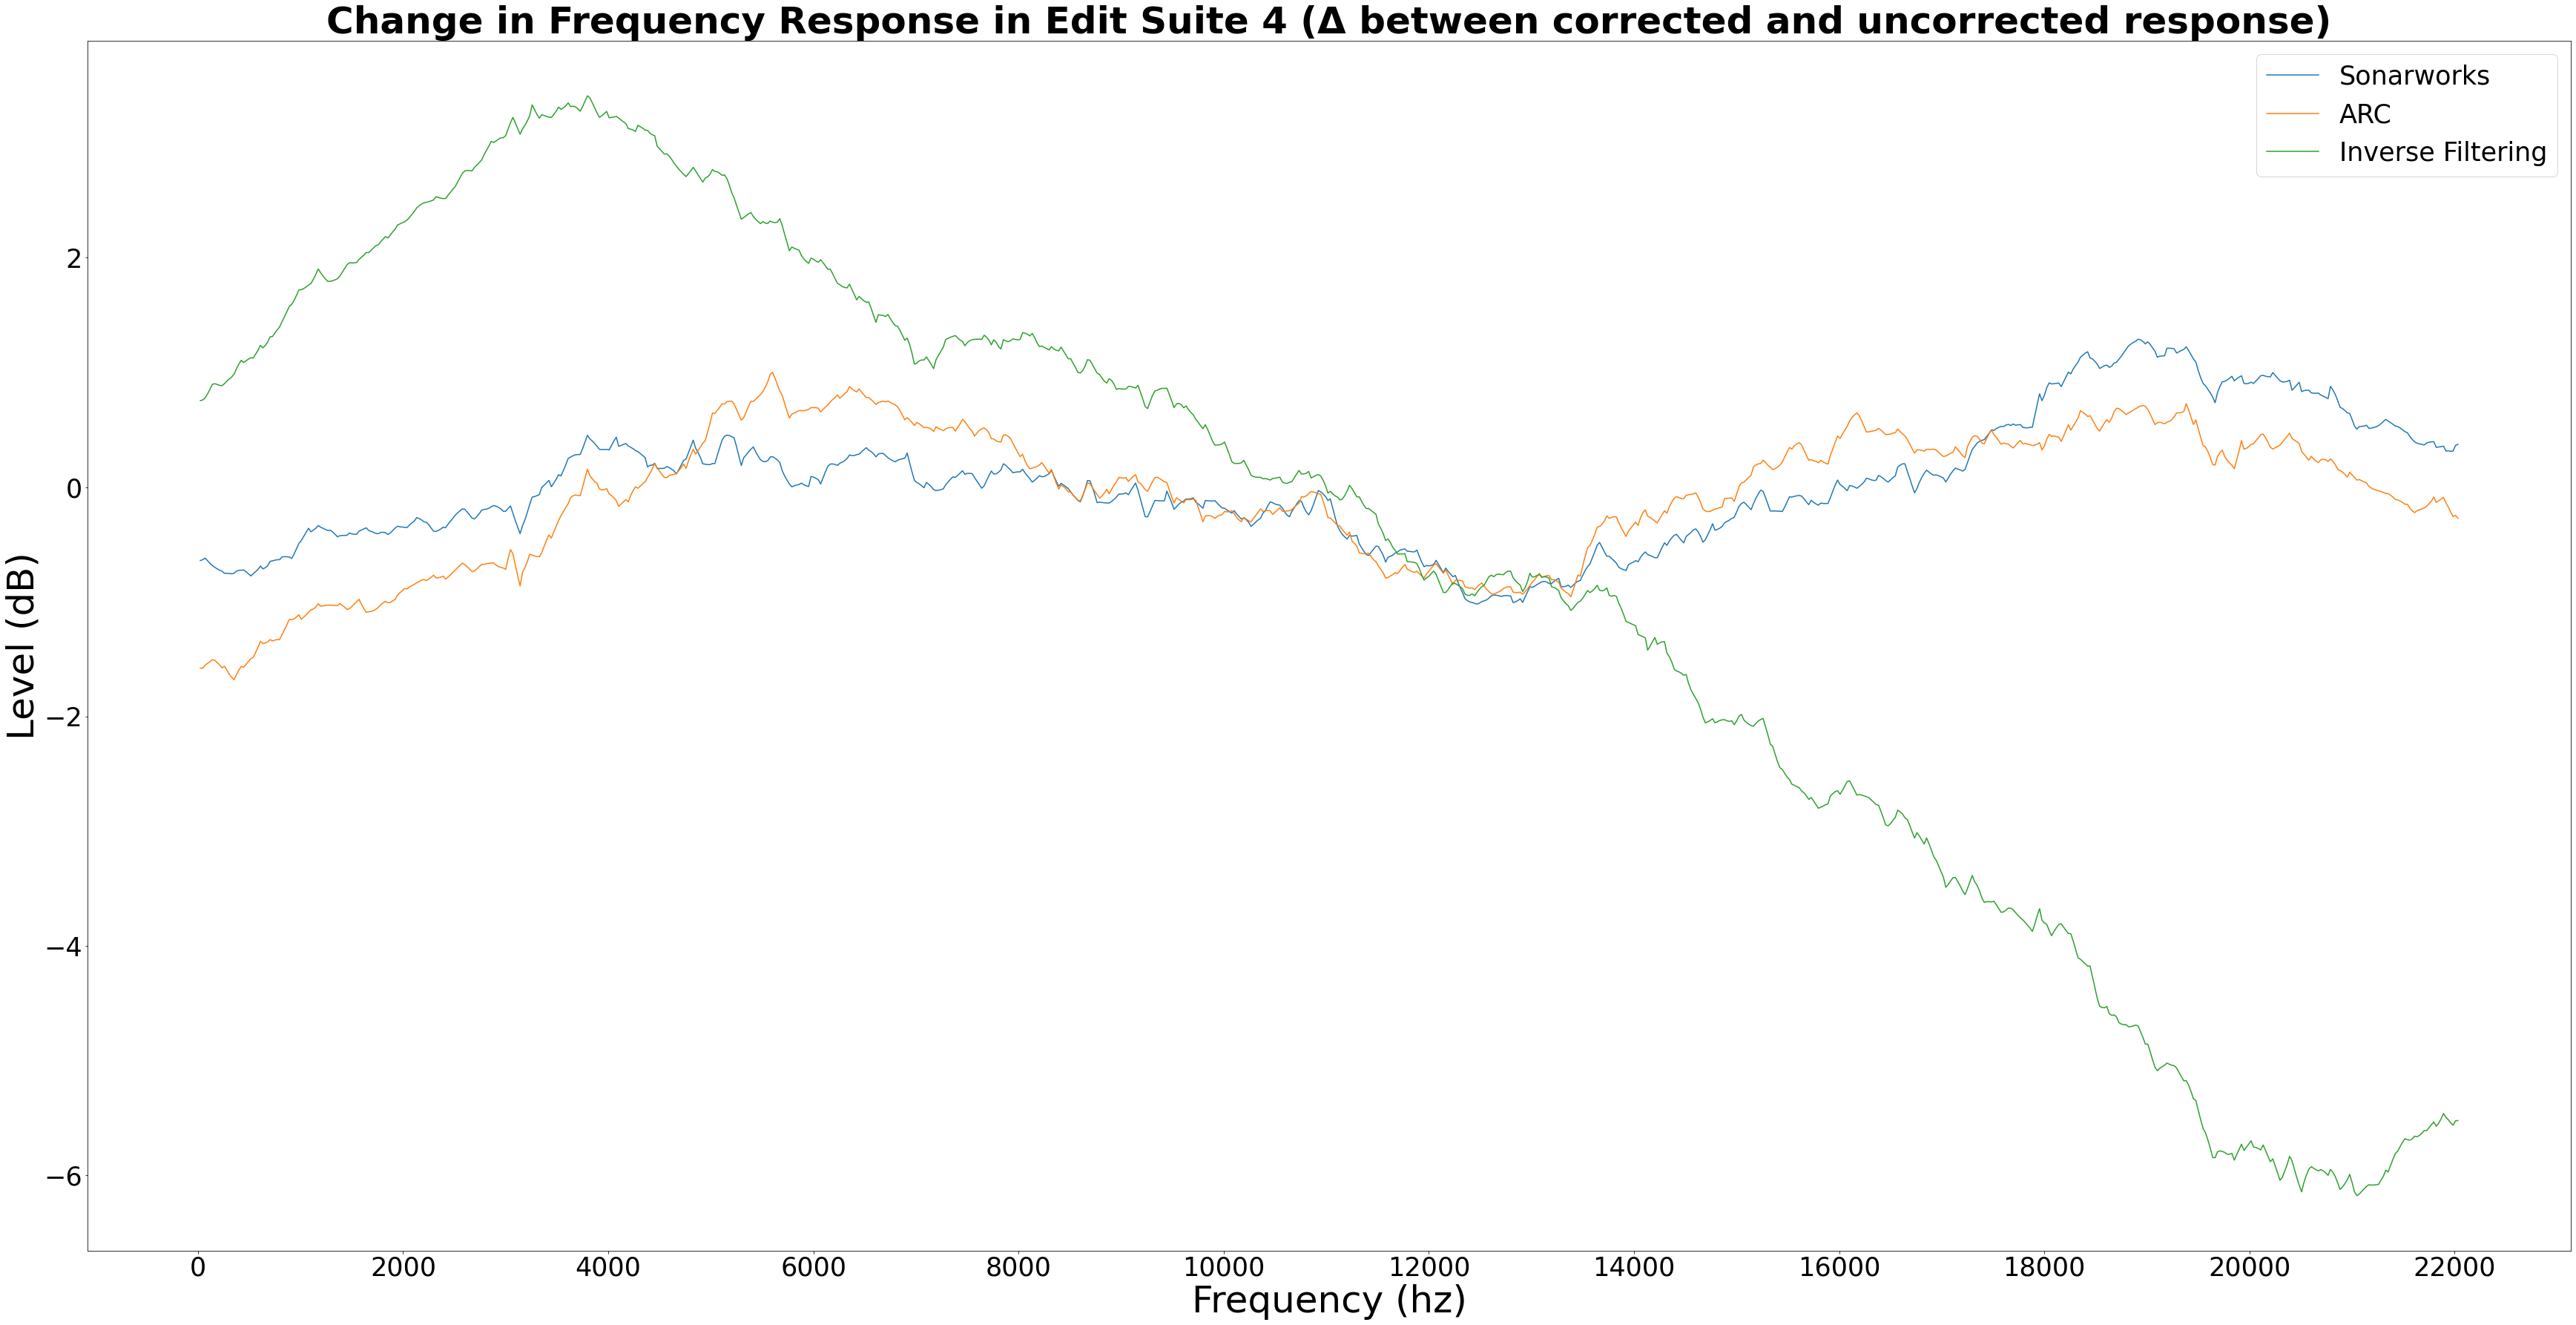

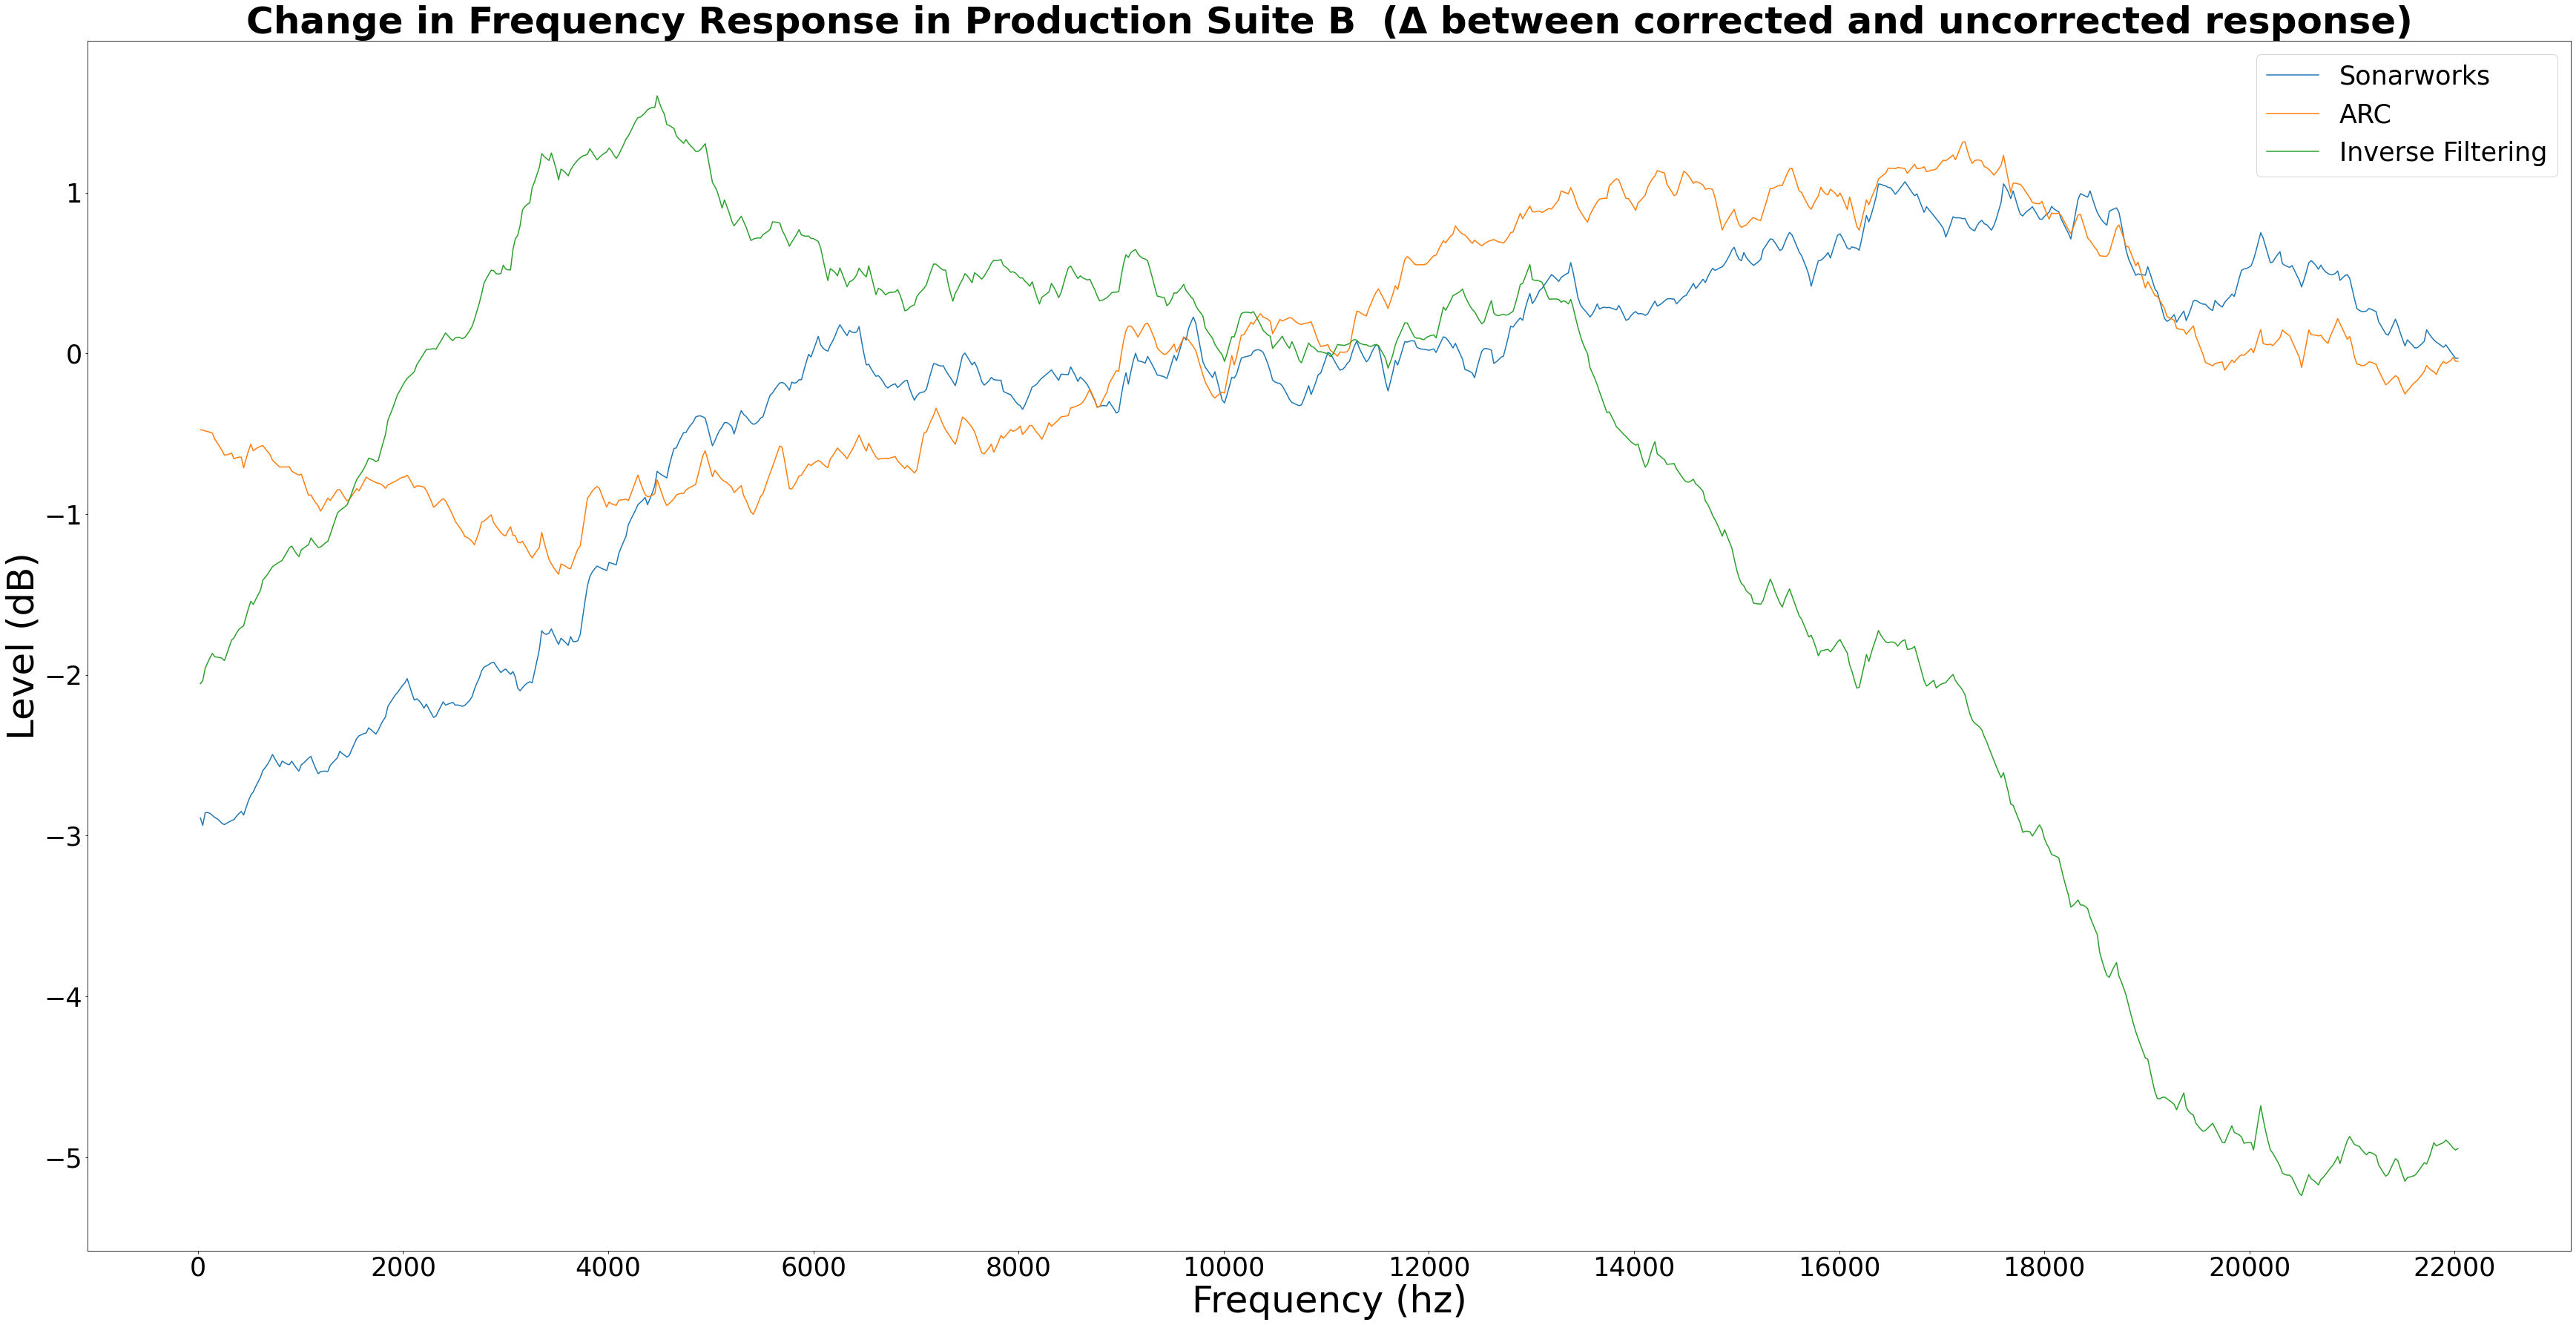

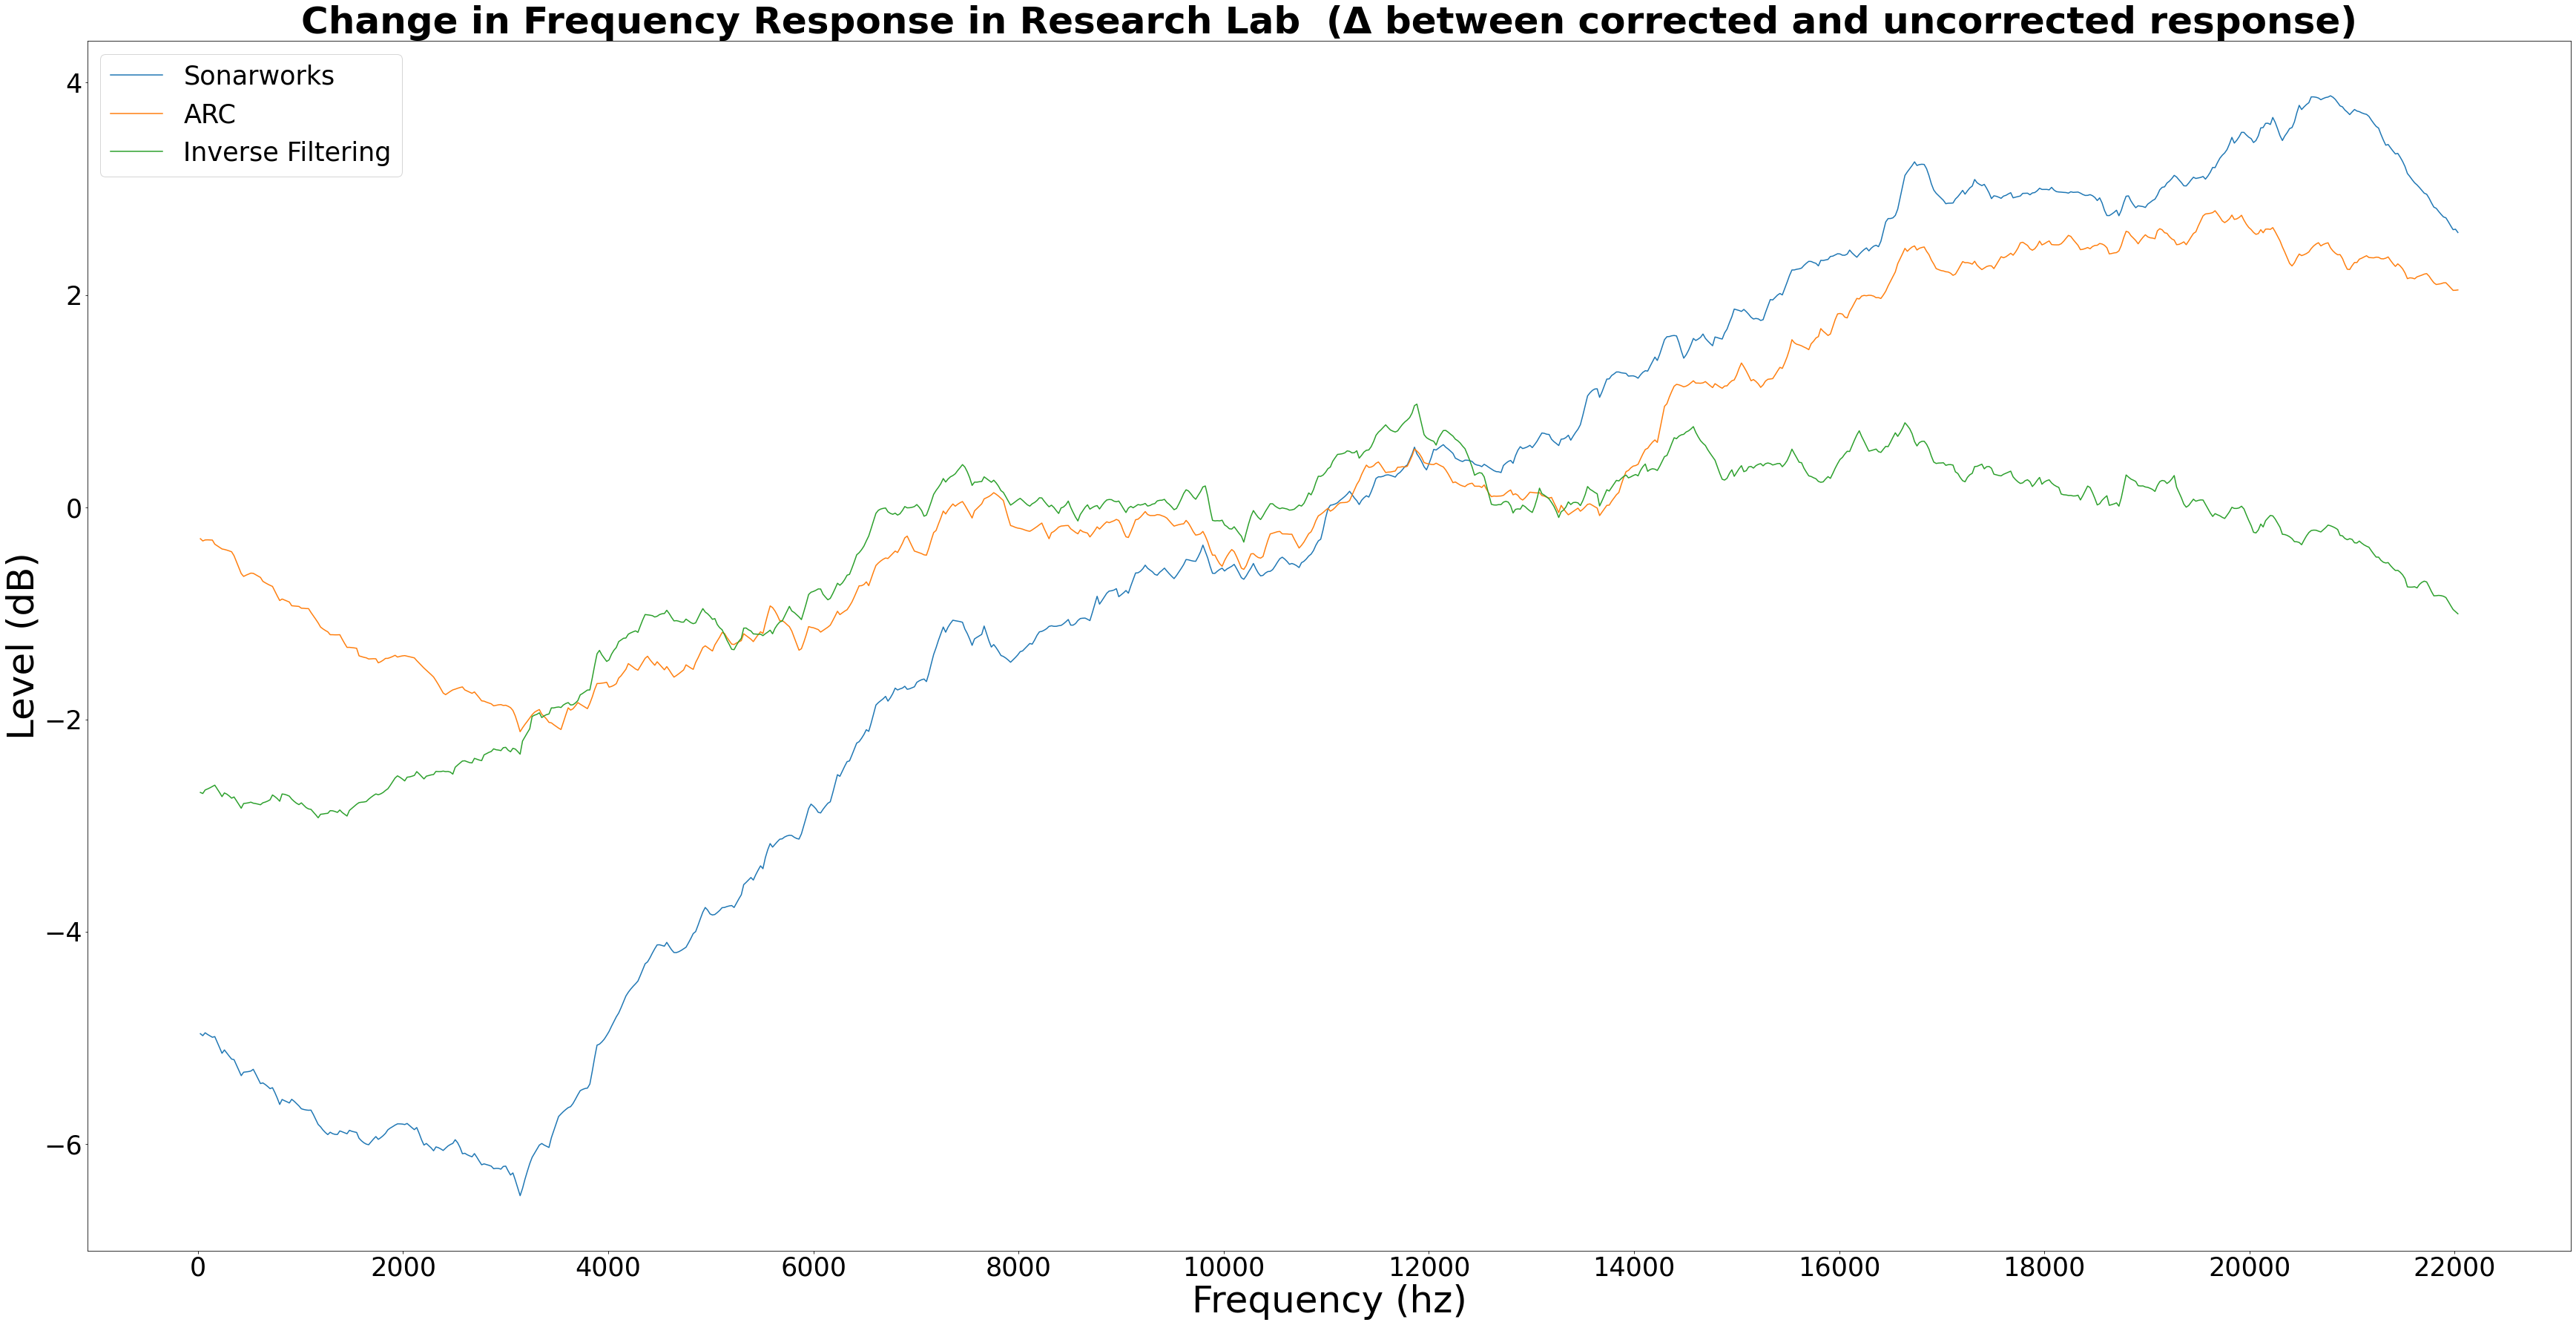

In [11]:
#TODO Create a modified version of this that will create delta IRs between the 3 systems in each room.
multiplot('EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Change in Frequency Response in Edit Suite 4 (Δ between corrected and uncorrected response)')
multiplot('PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Change in Frequency Response in Production Suite B  (Δ between corrected and uncorrected response)')
multiplot('RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Change in Frequency Response in Research Lab  (Δ between corrected and uncorrected response)')

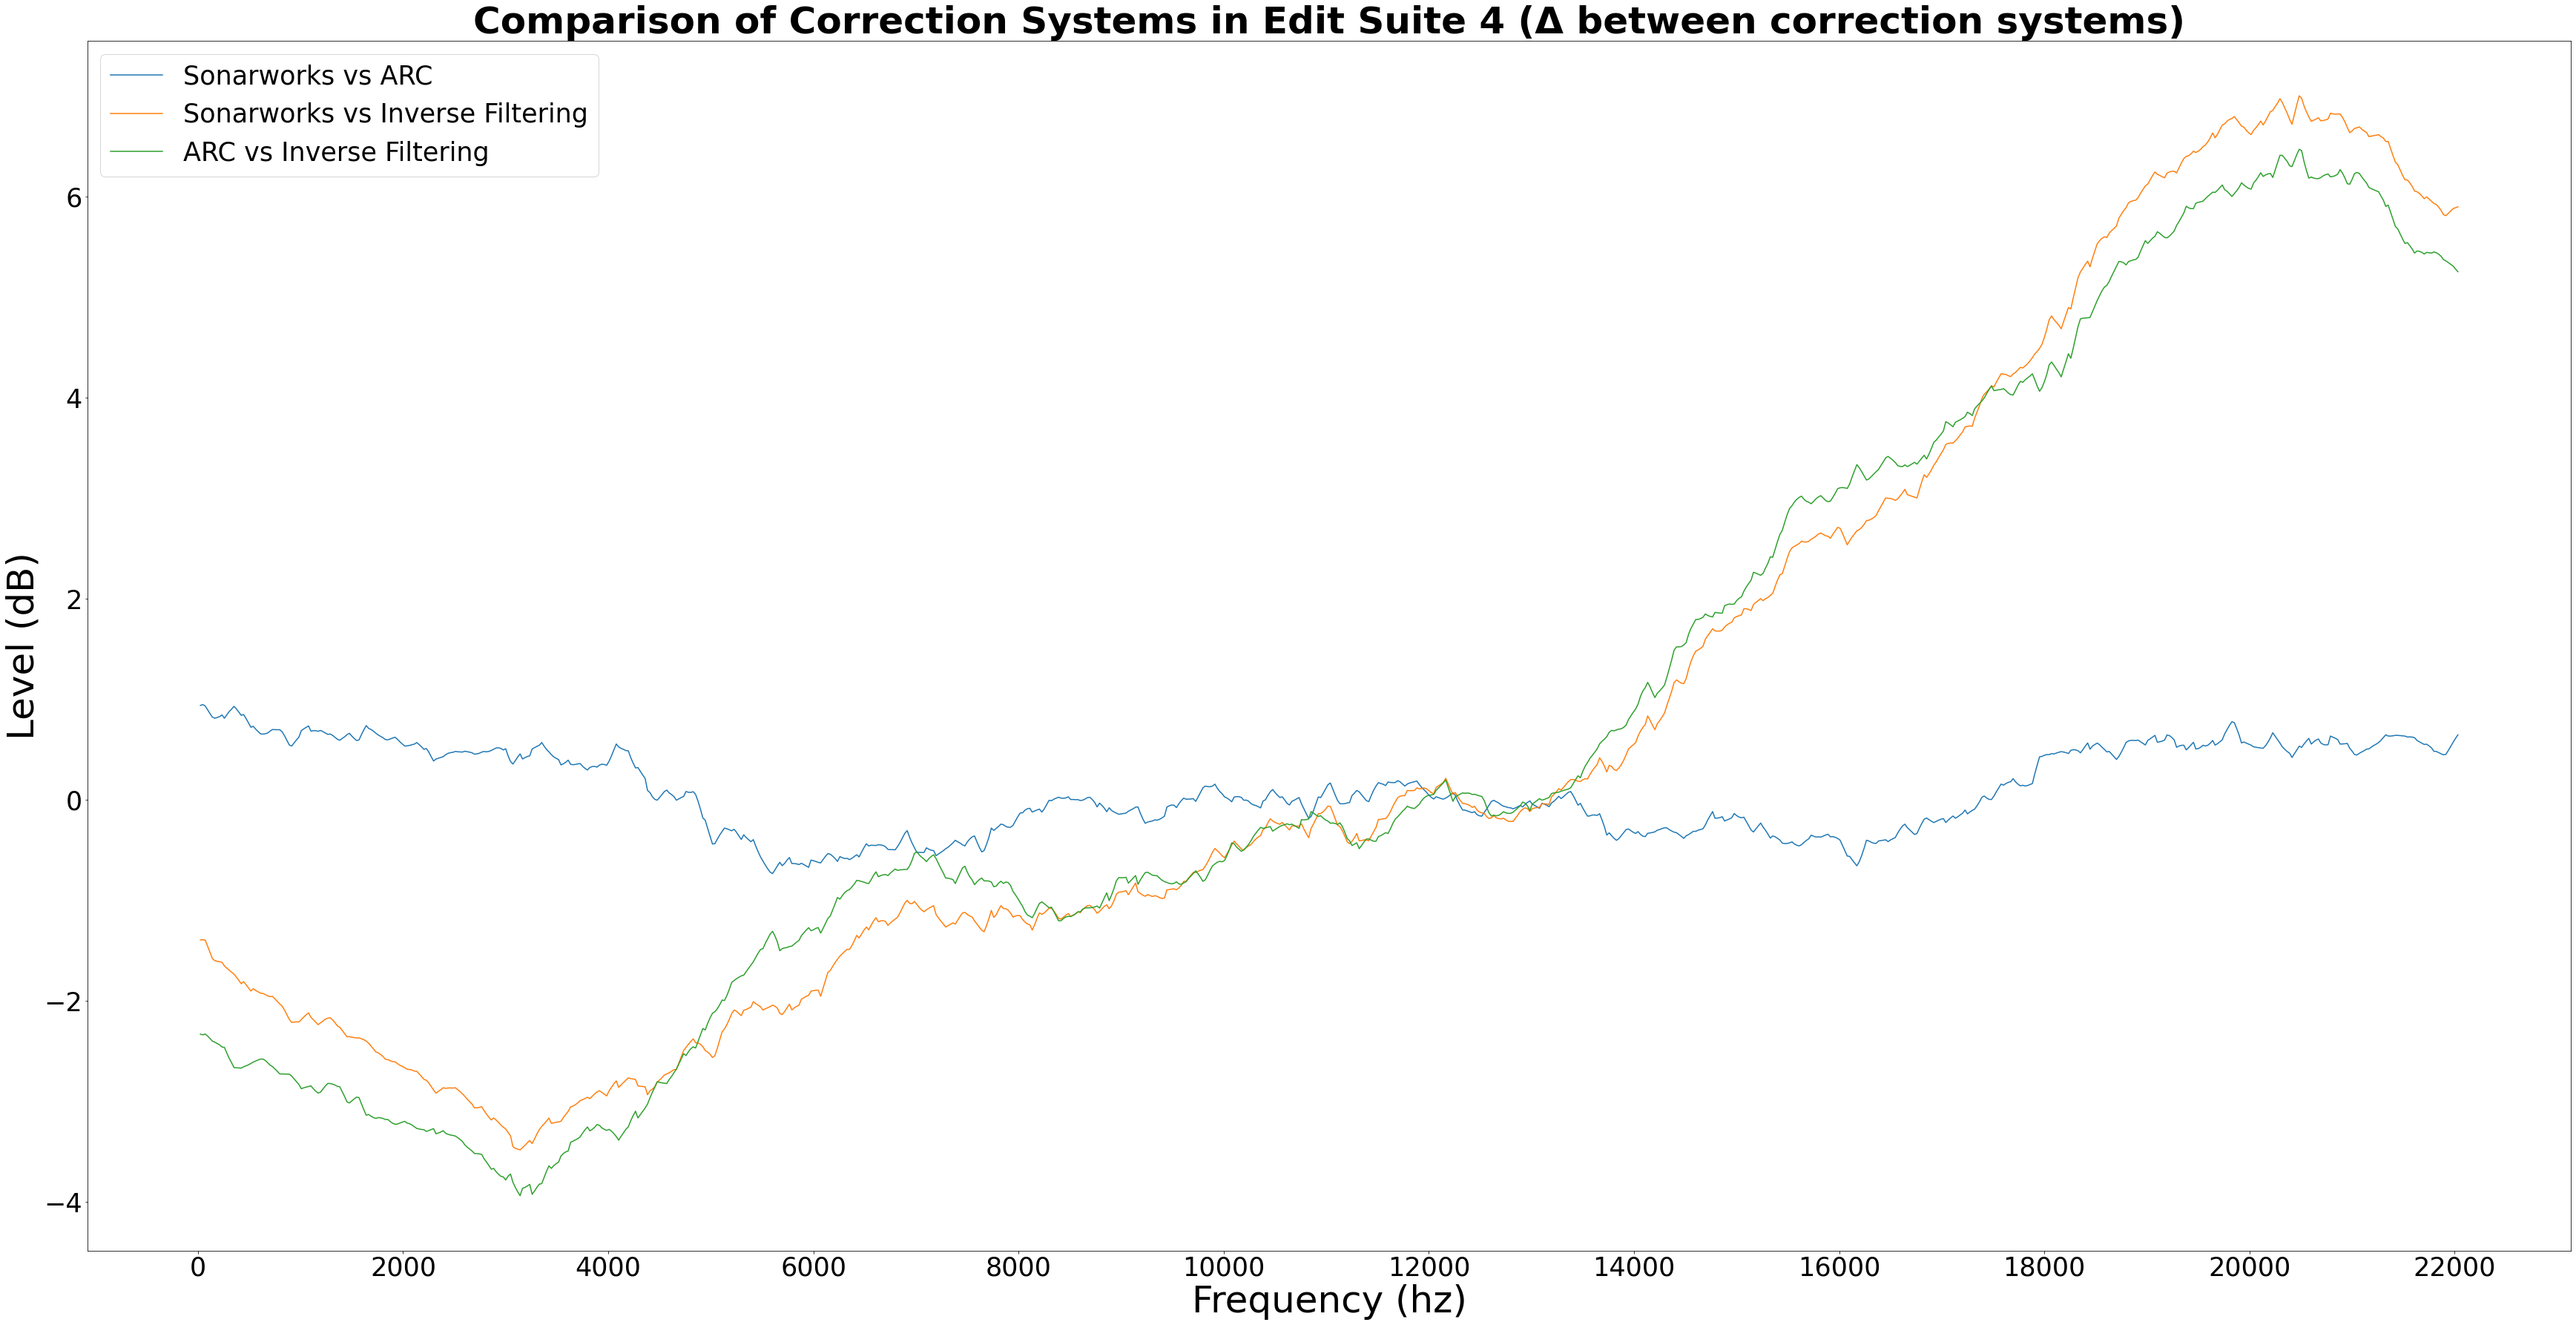

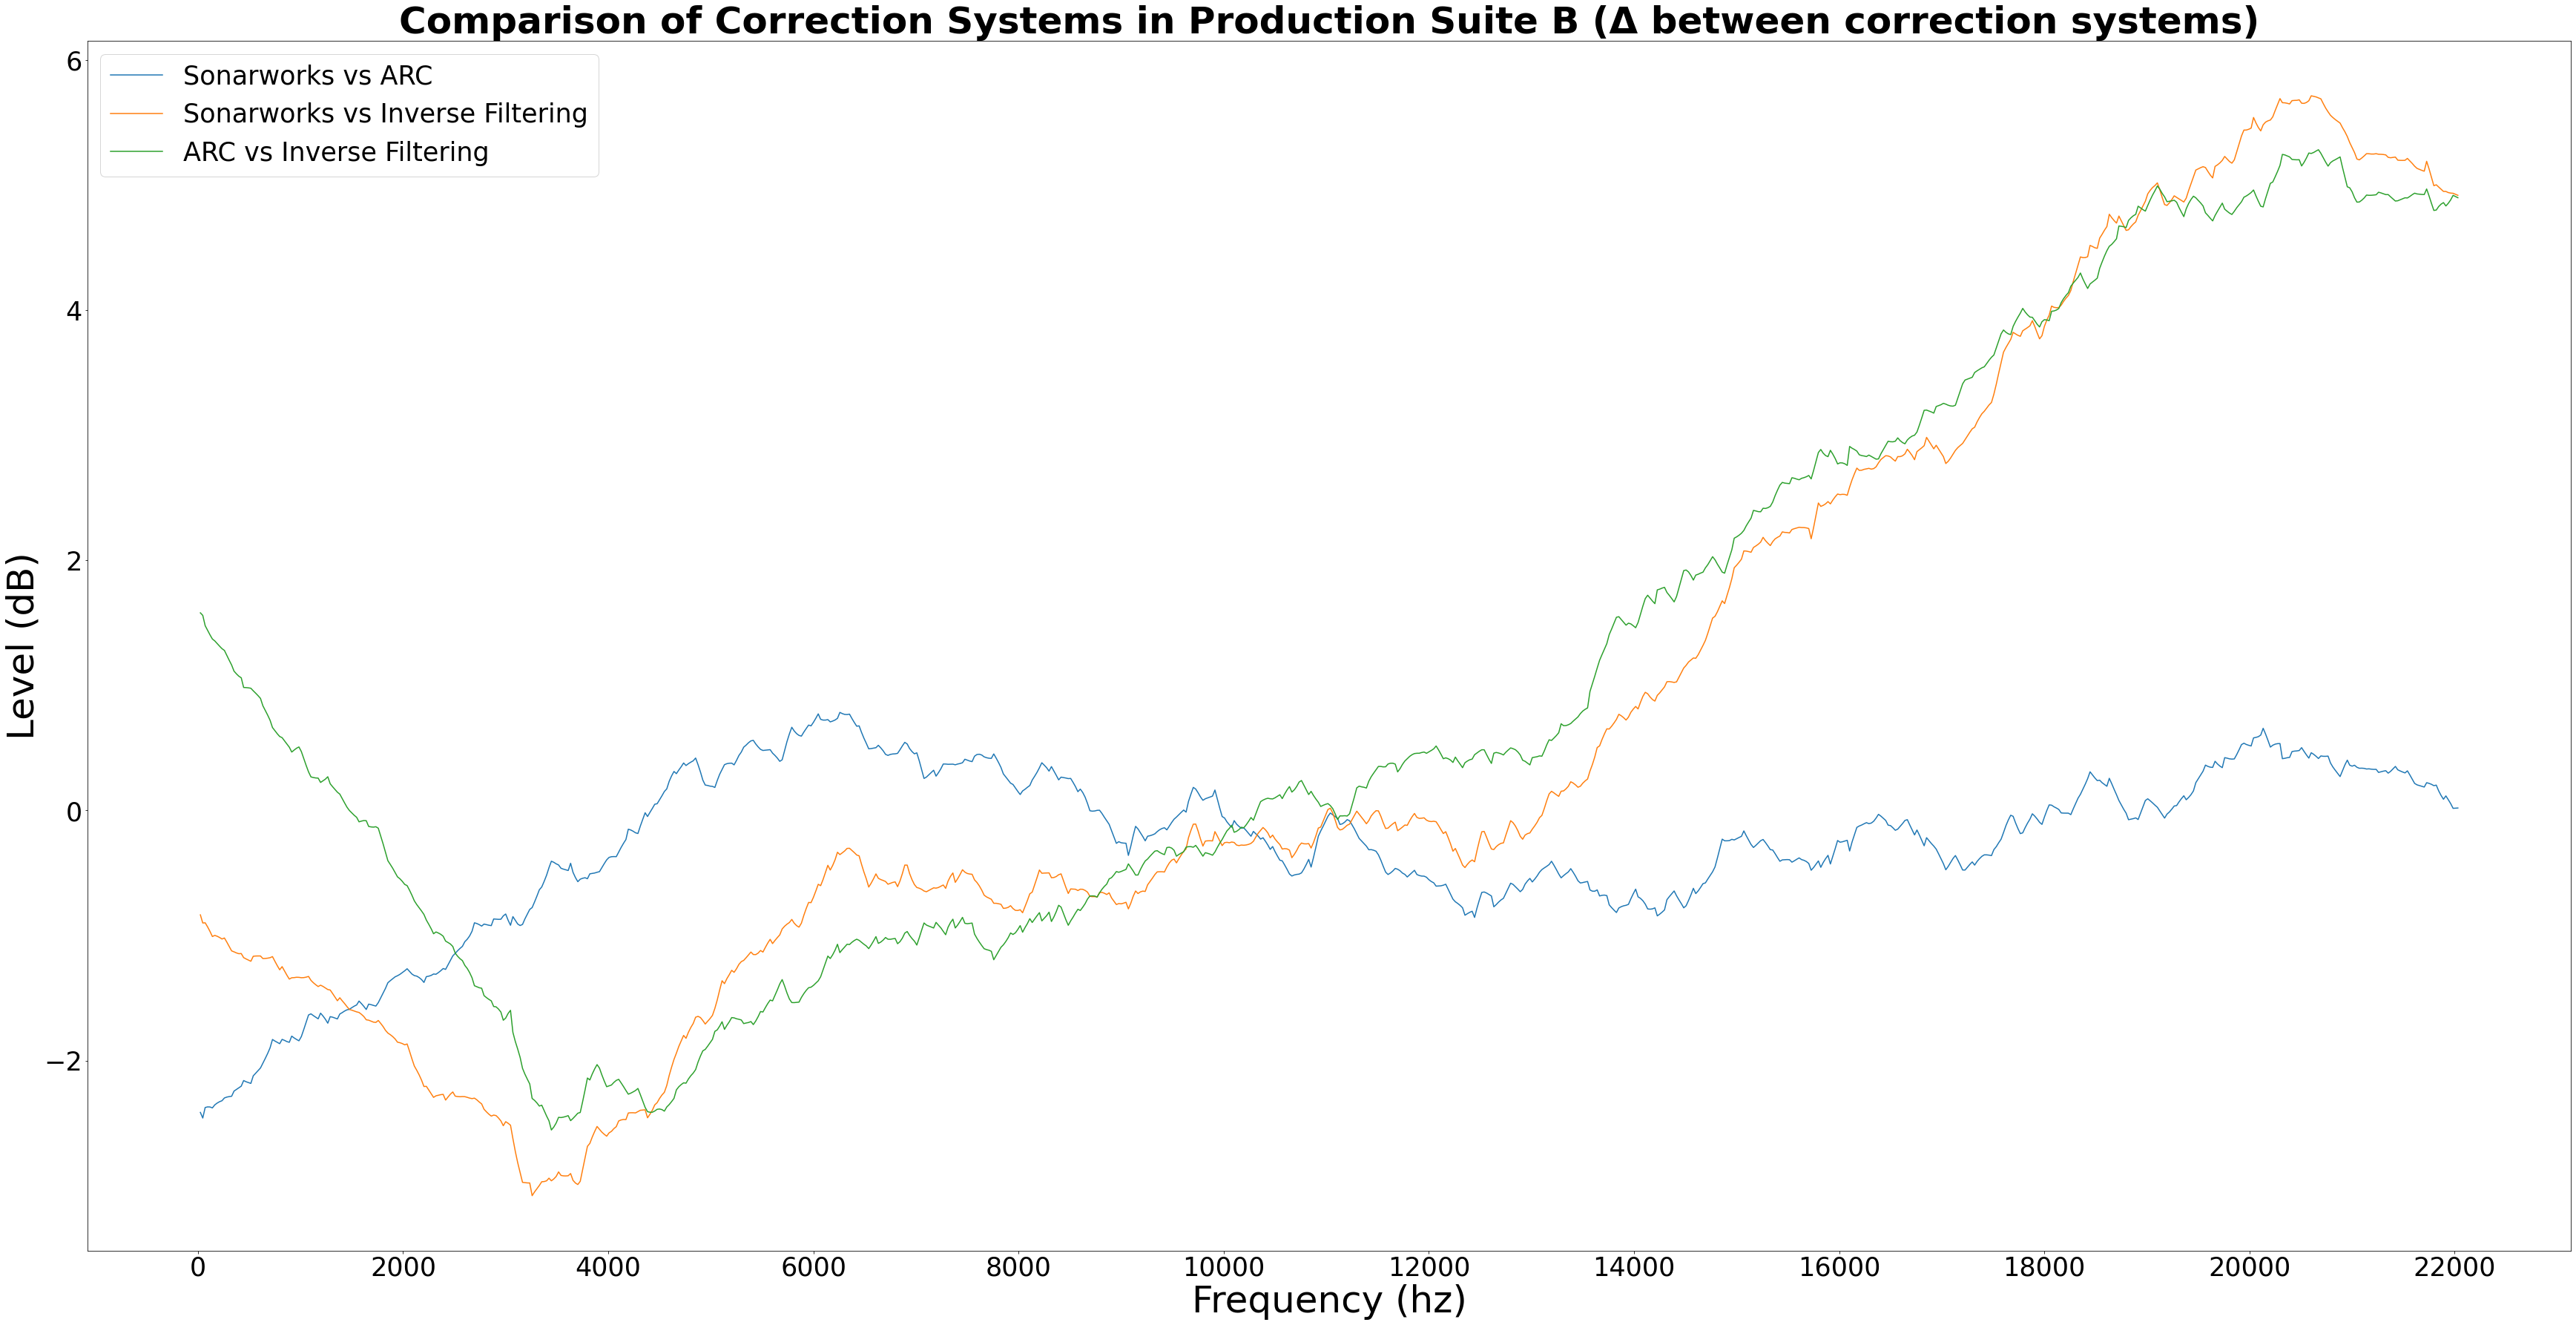

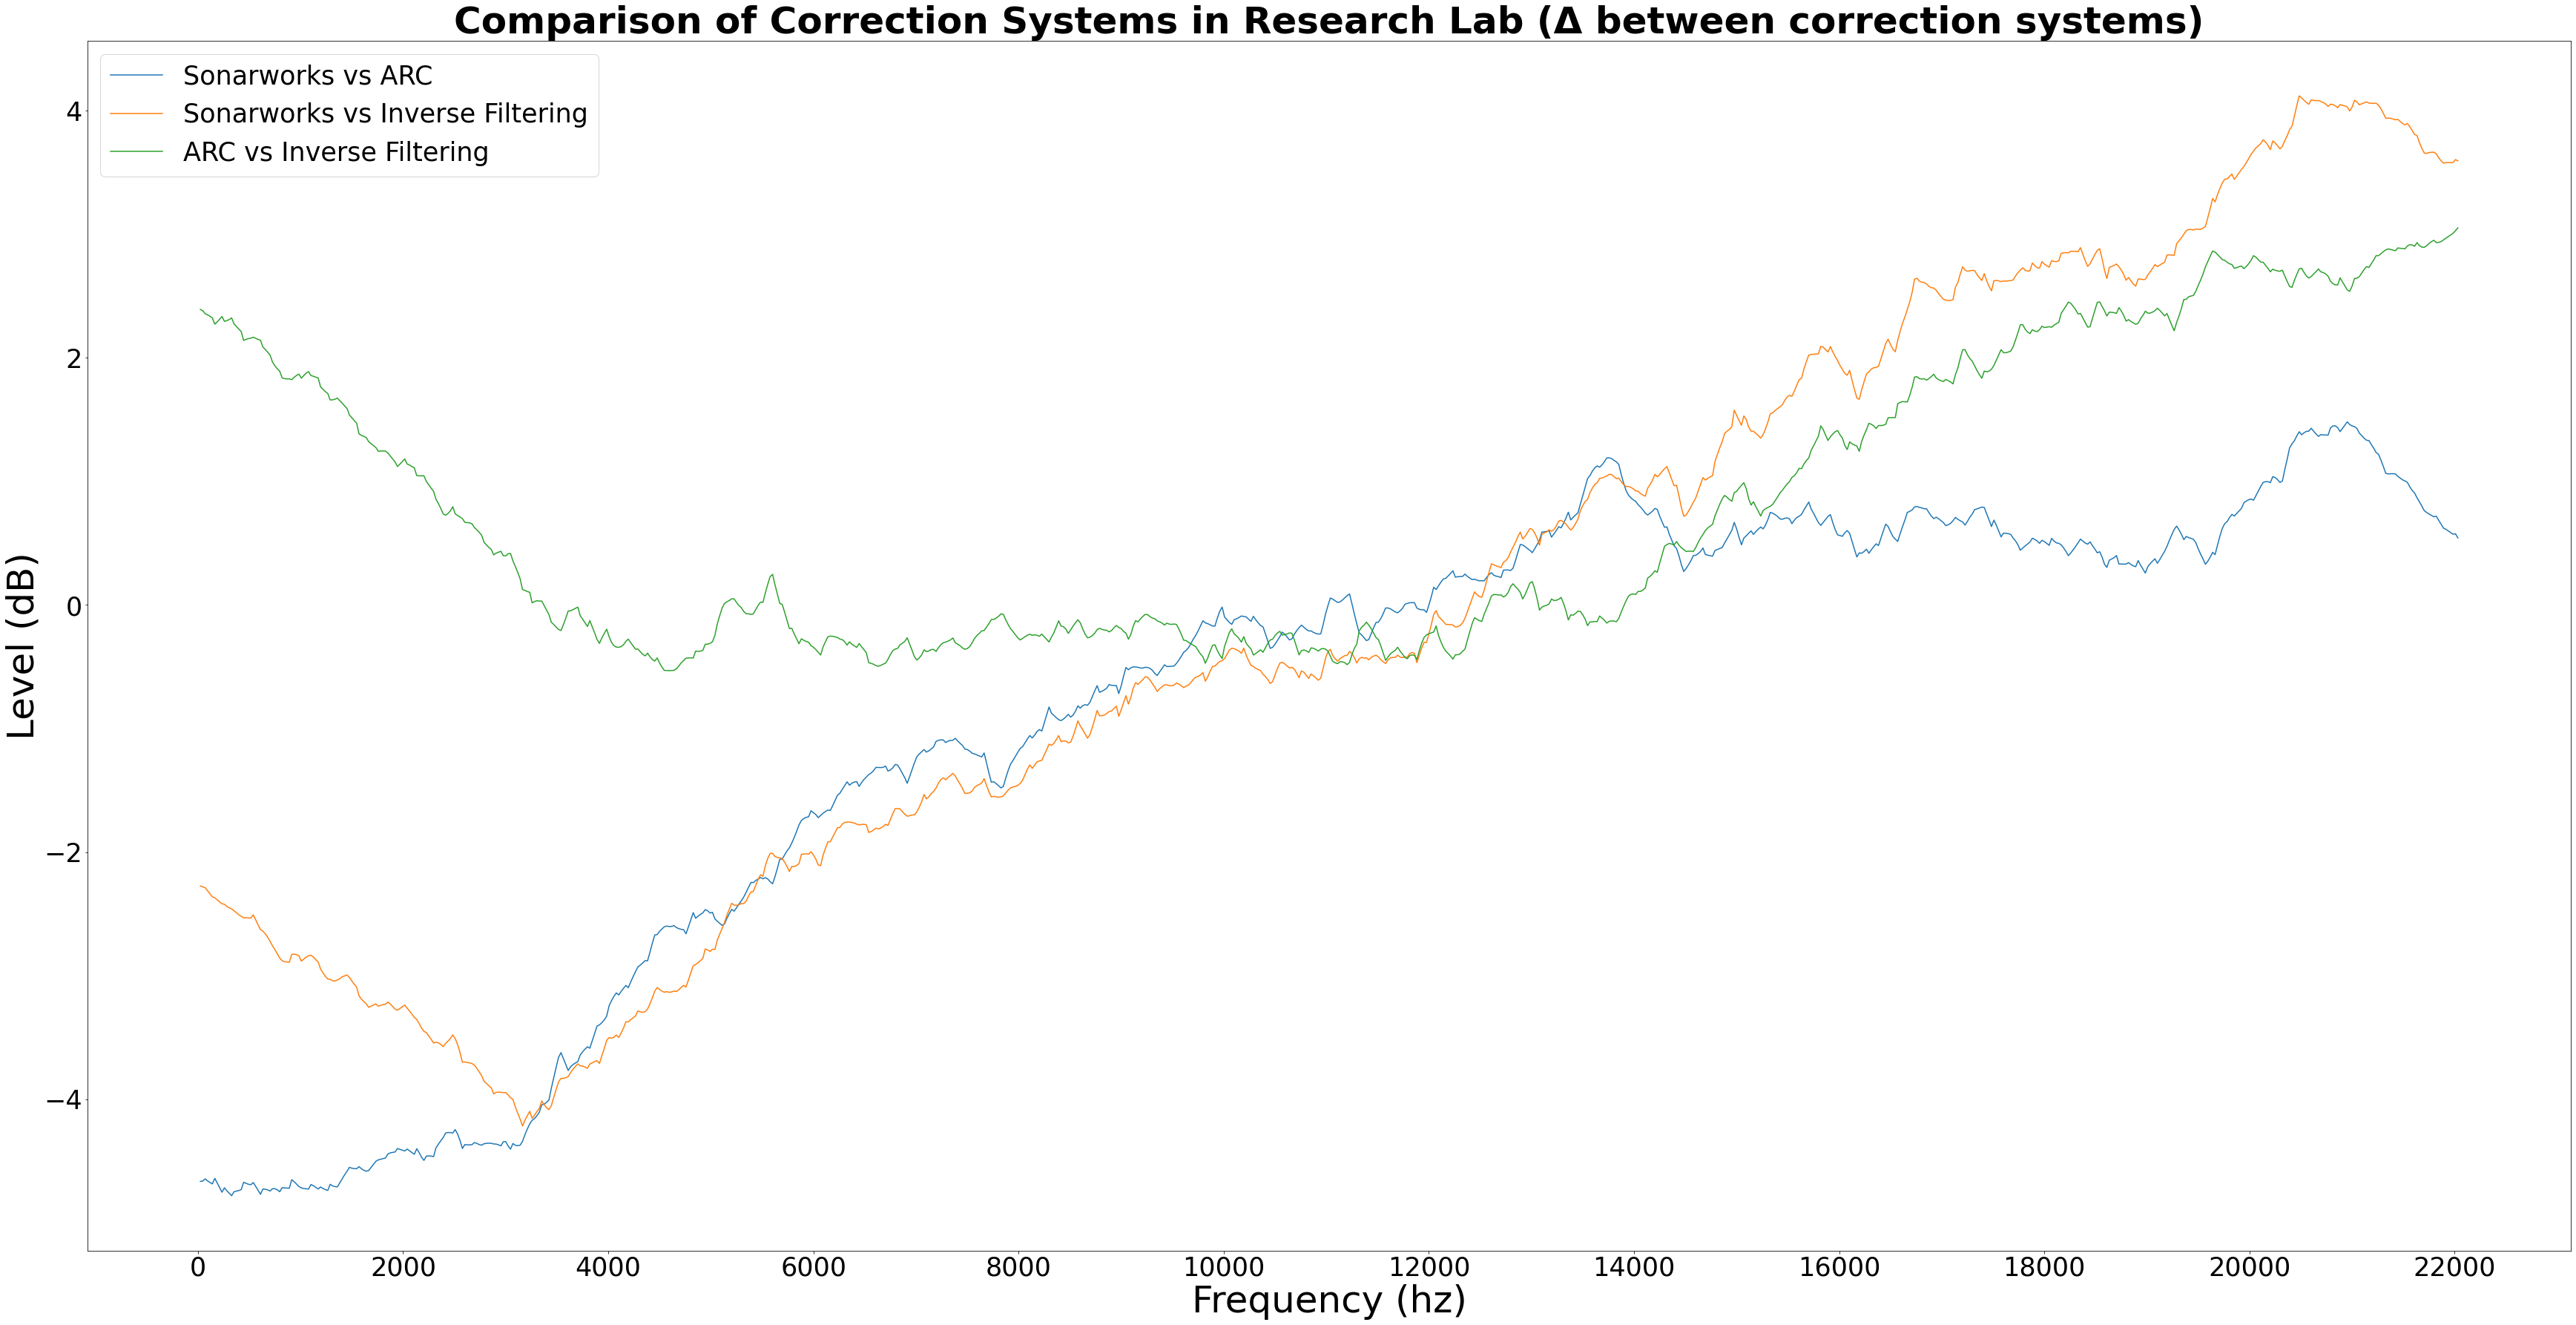

In [12]:
diffplots('EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','EDIT-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Comparison of Correction Systems in Edit Suite 4 (Δ between correction systems)')
diffplots('PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','PROD-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Comparison of Correction Systems in Production Suite B (Δ between correction systems)')
diffplots('RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','RLAB-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Comparison of Correction Systems in Research Lab (Δ between correction systems)')

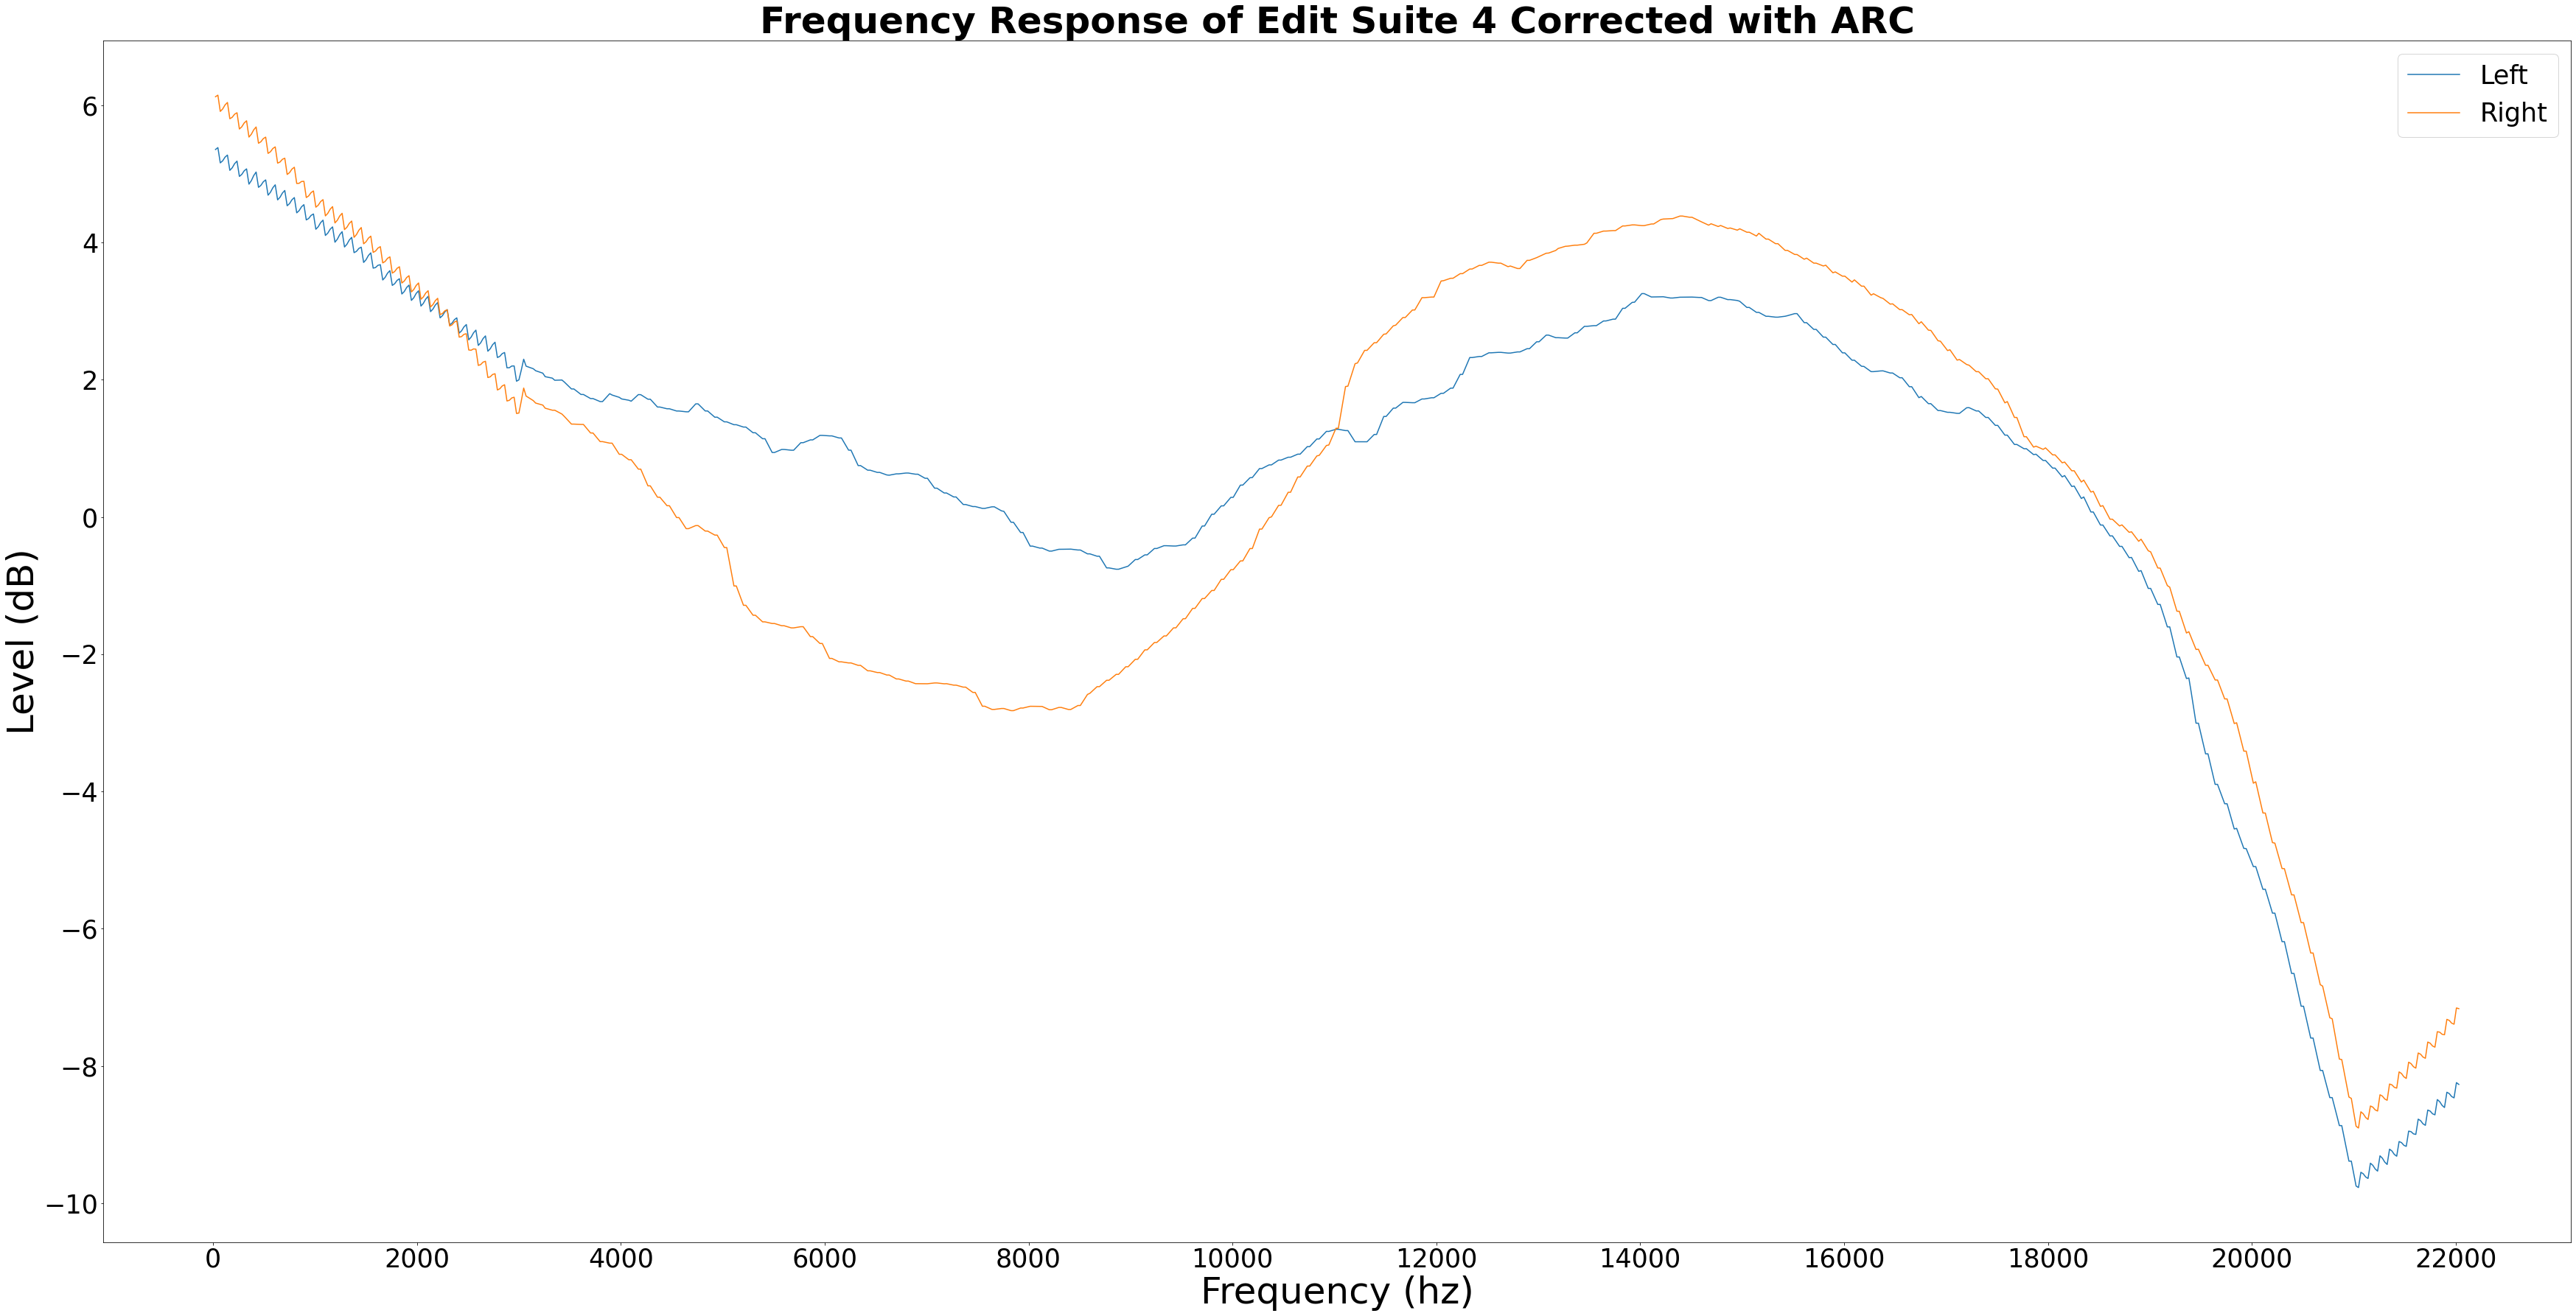

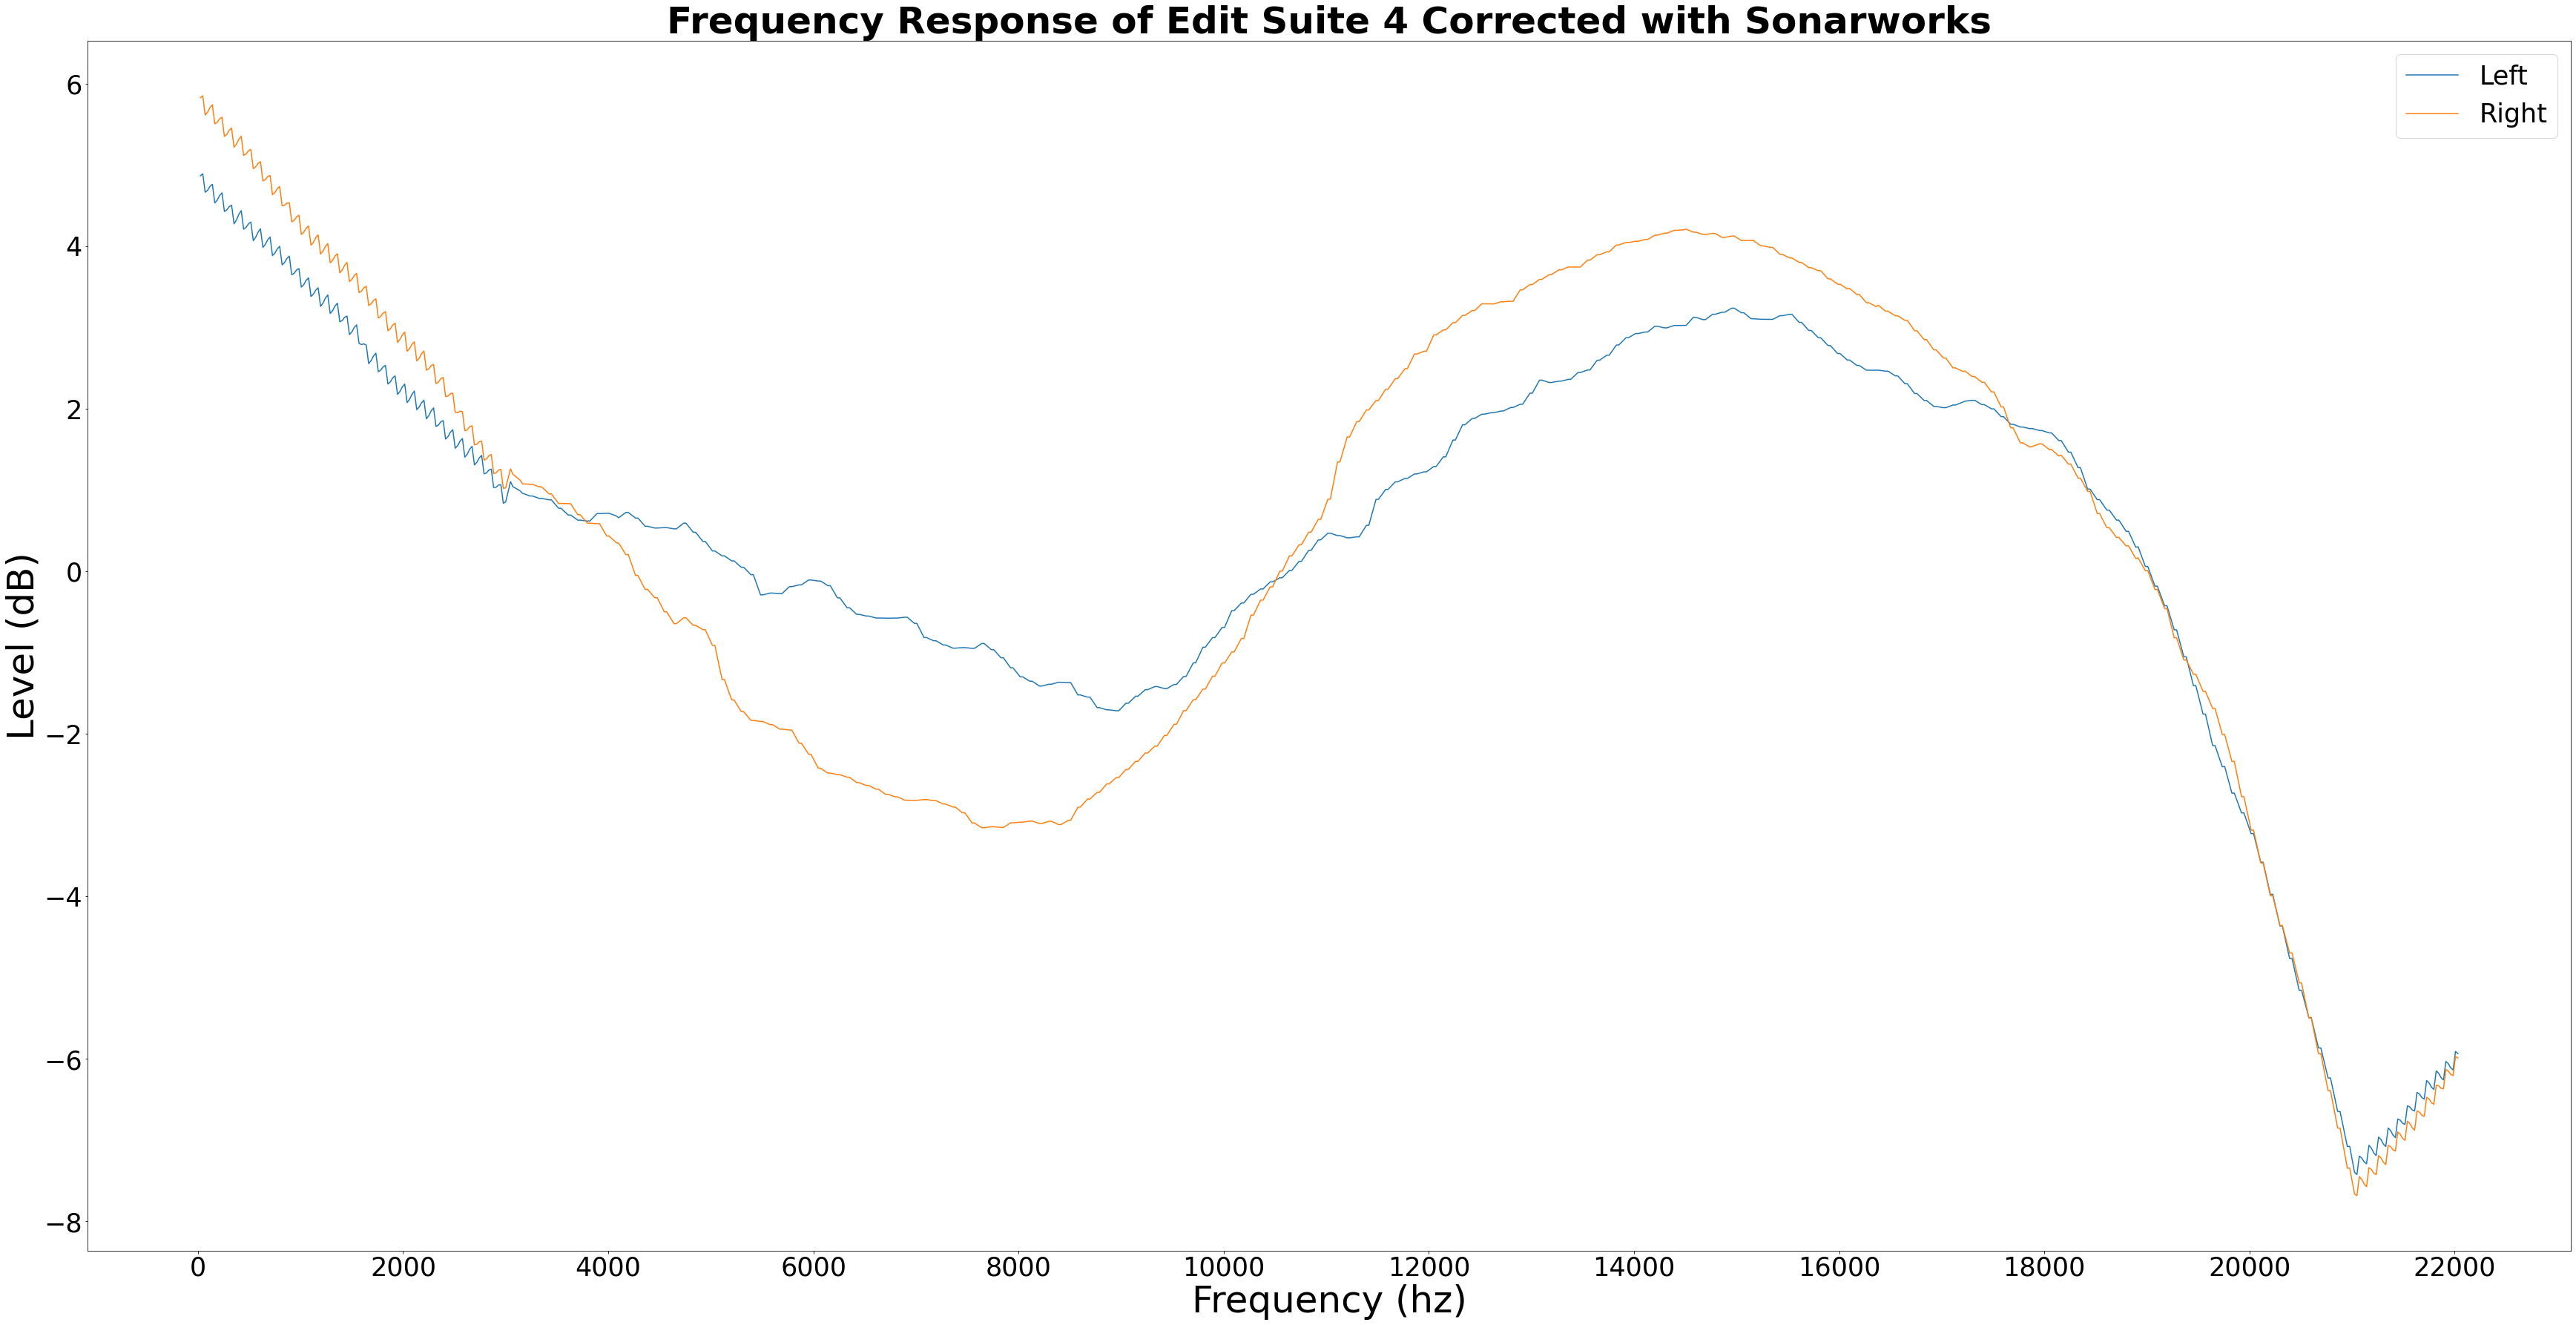

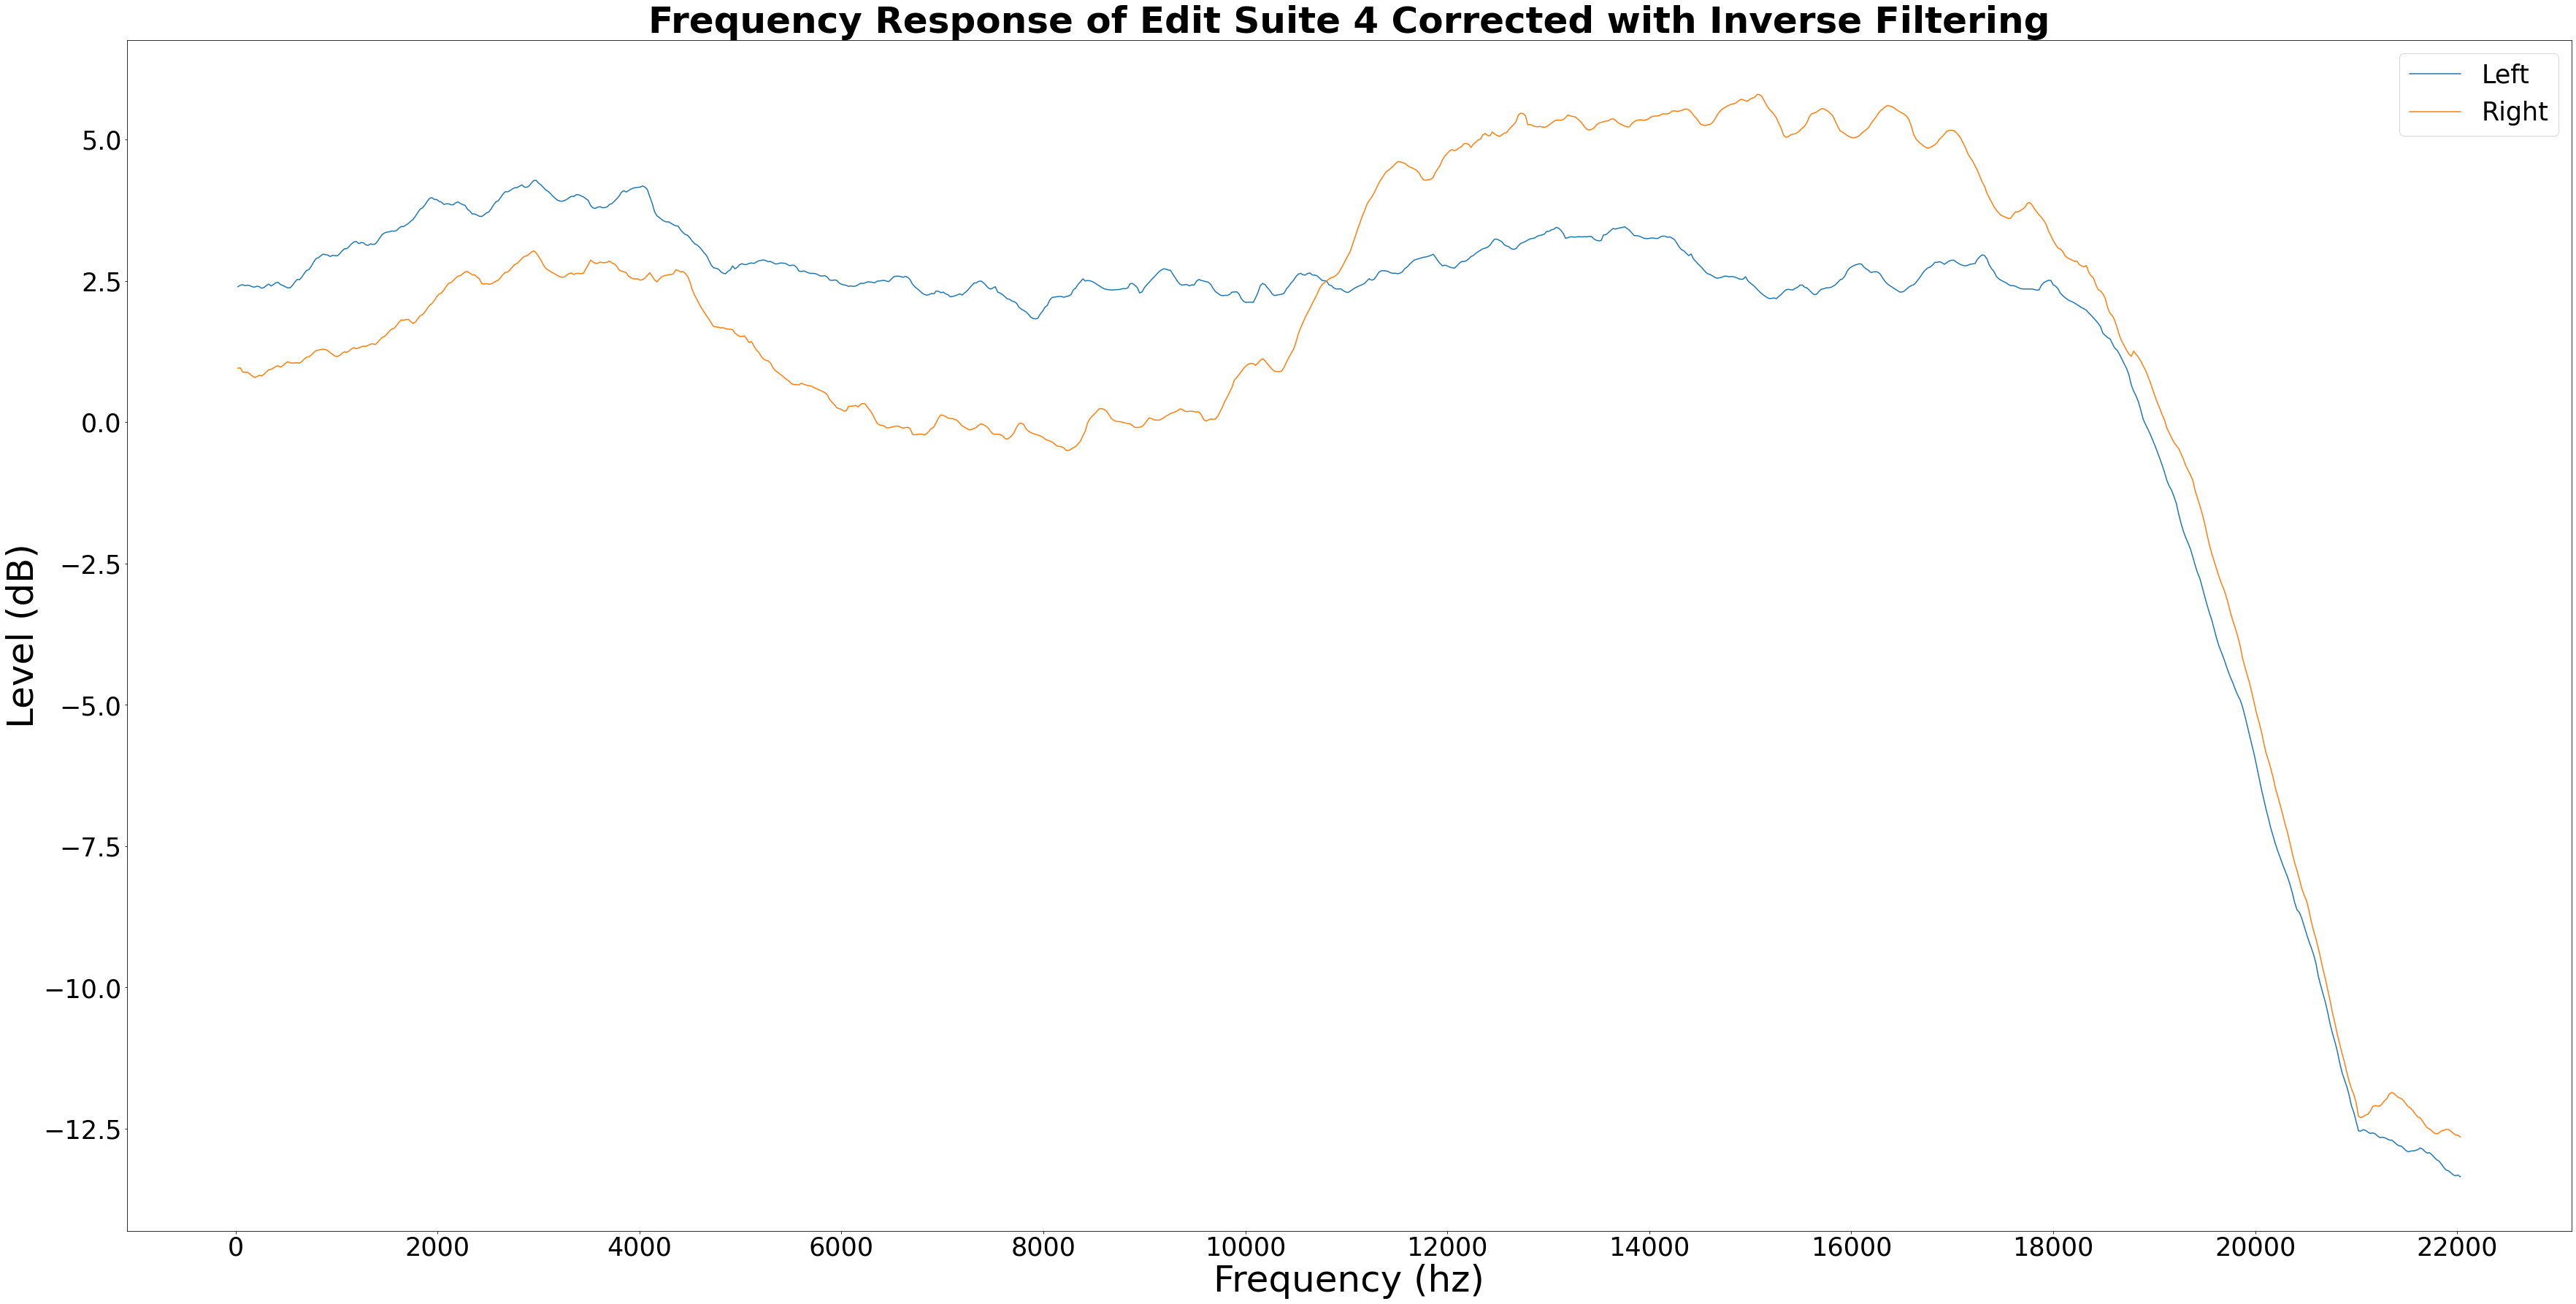

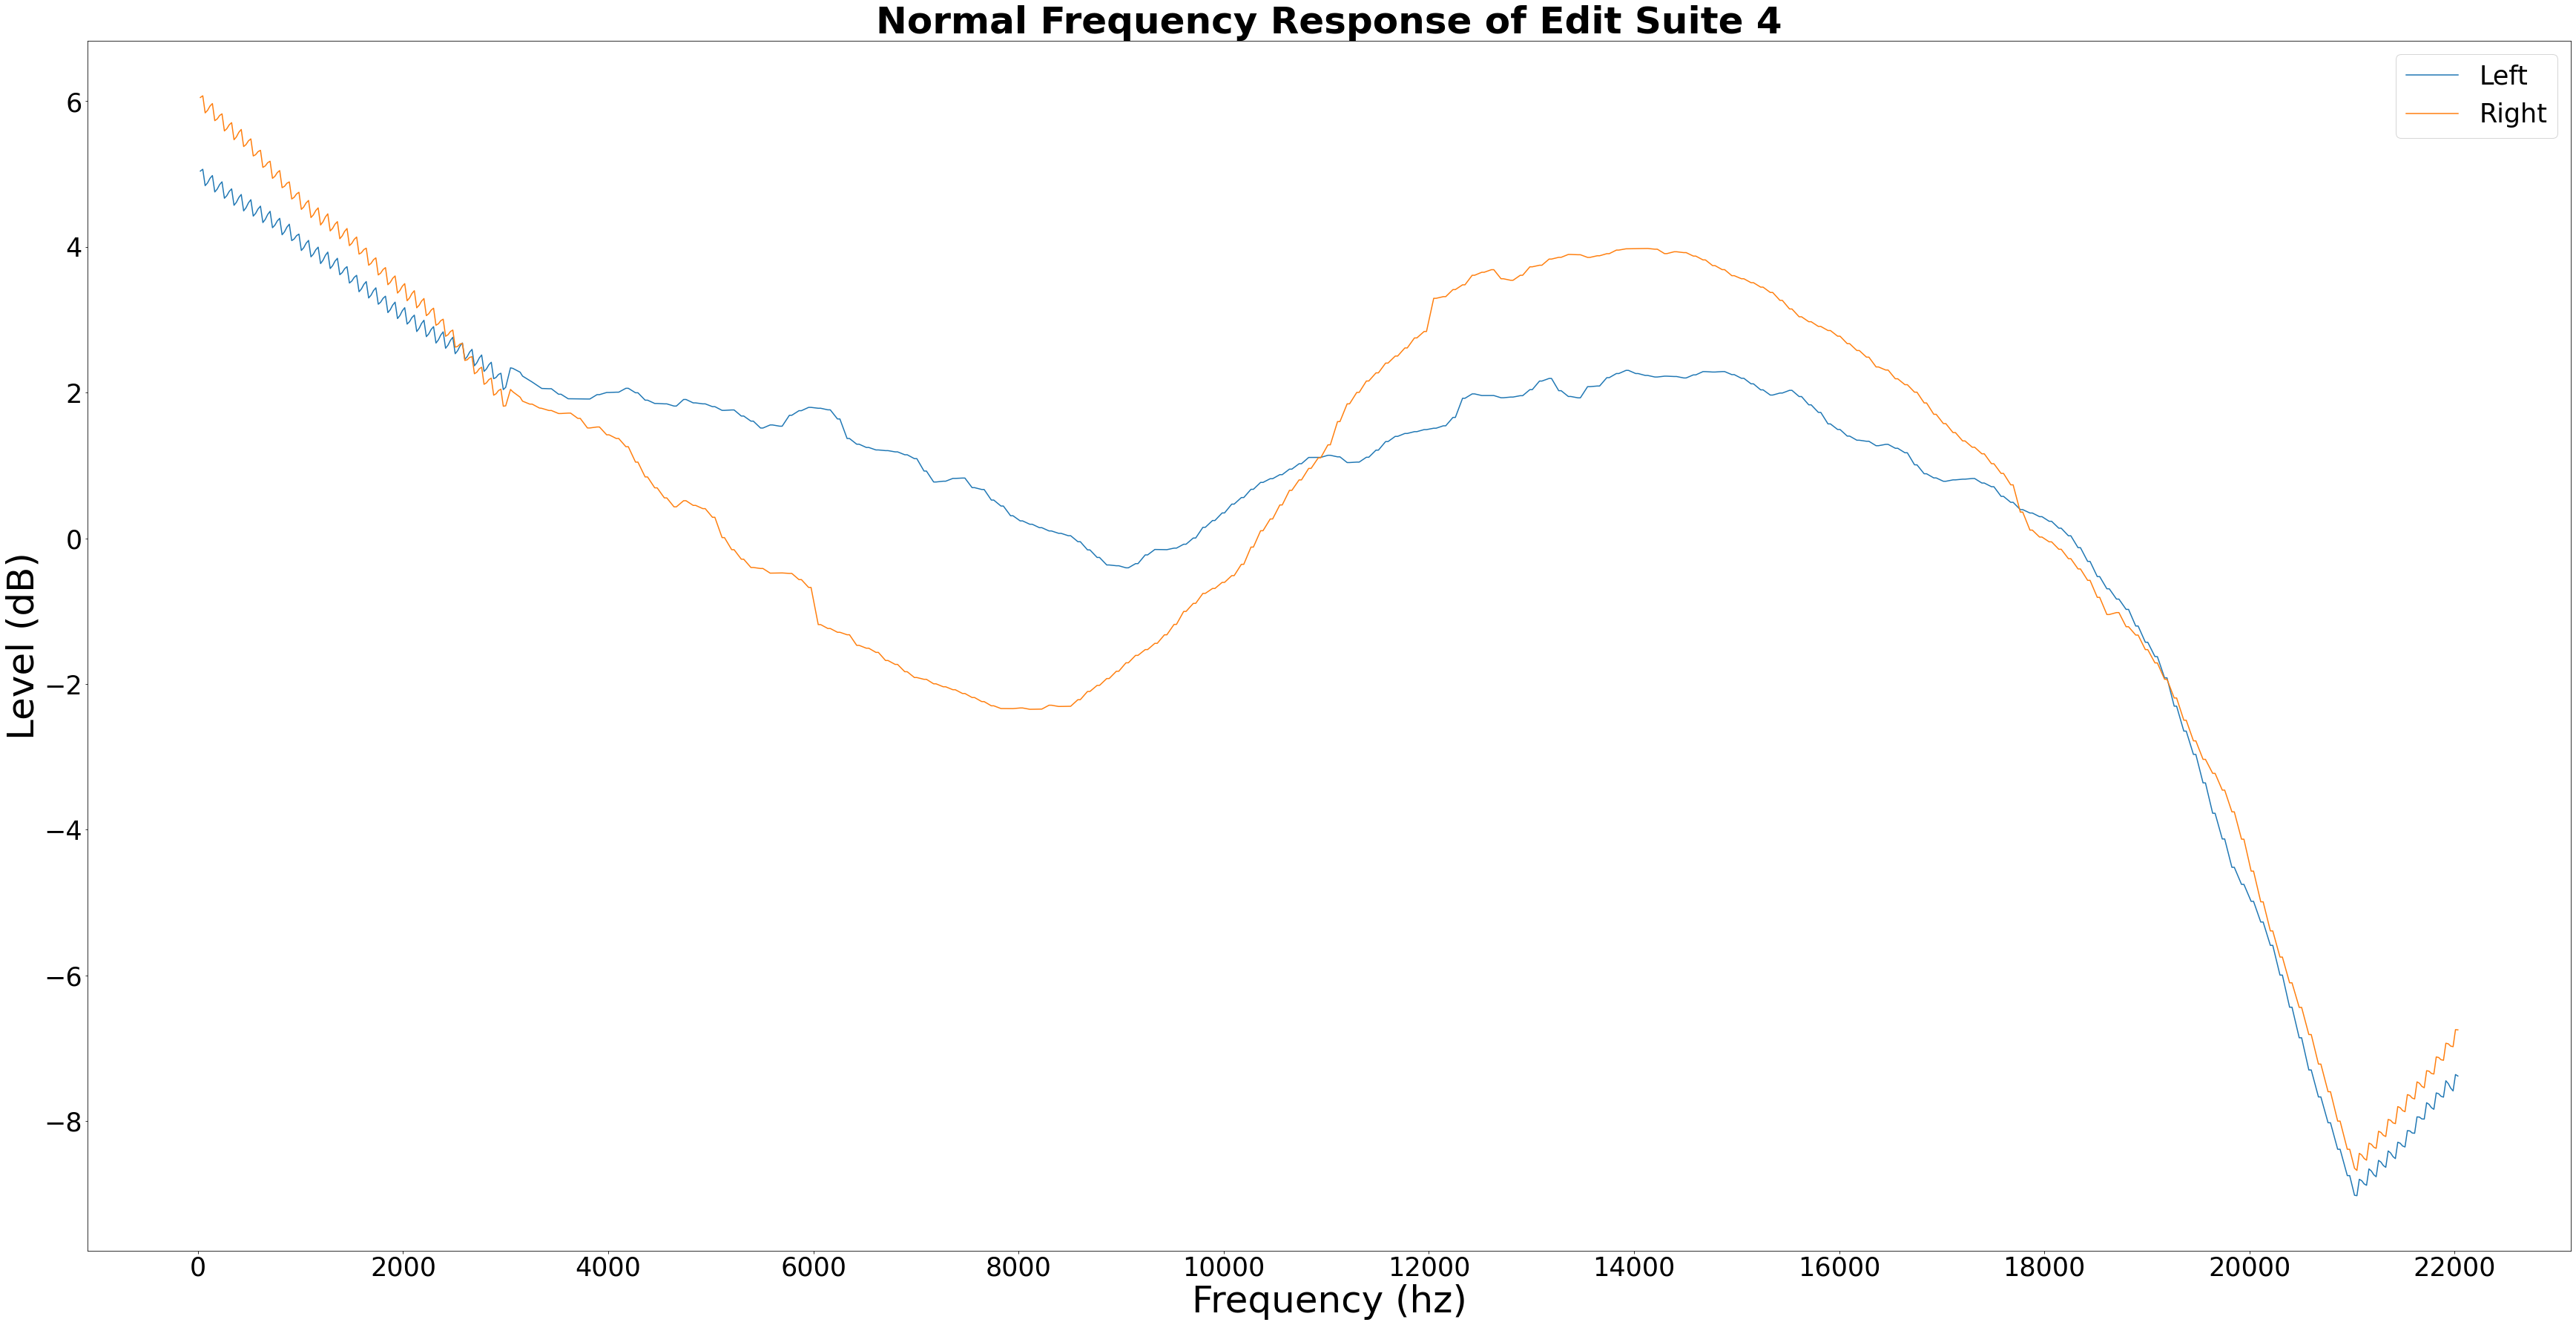

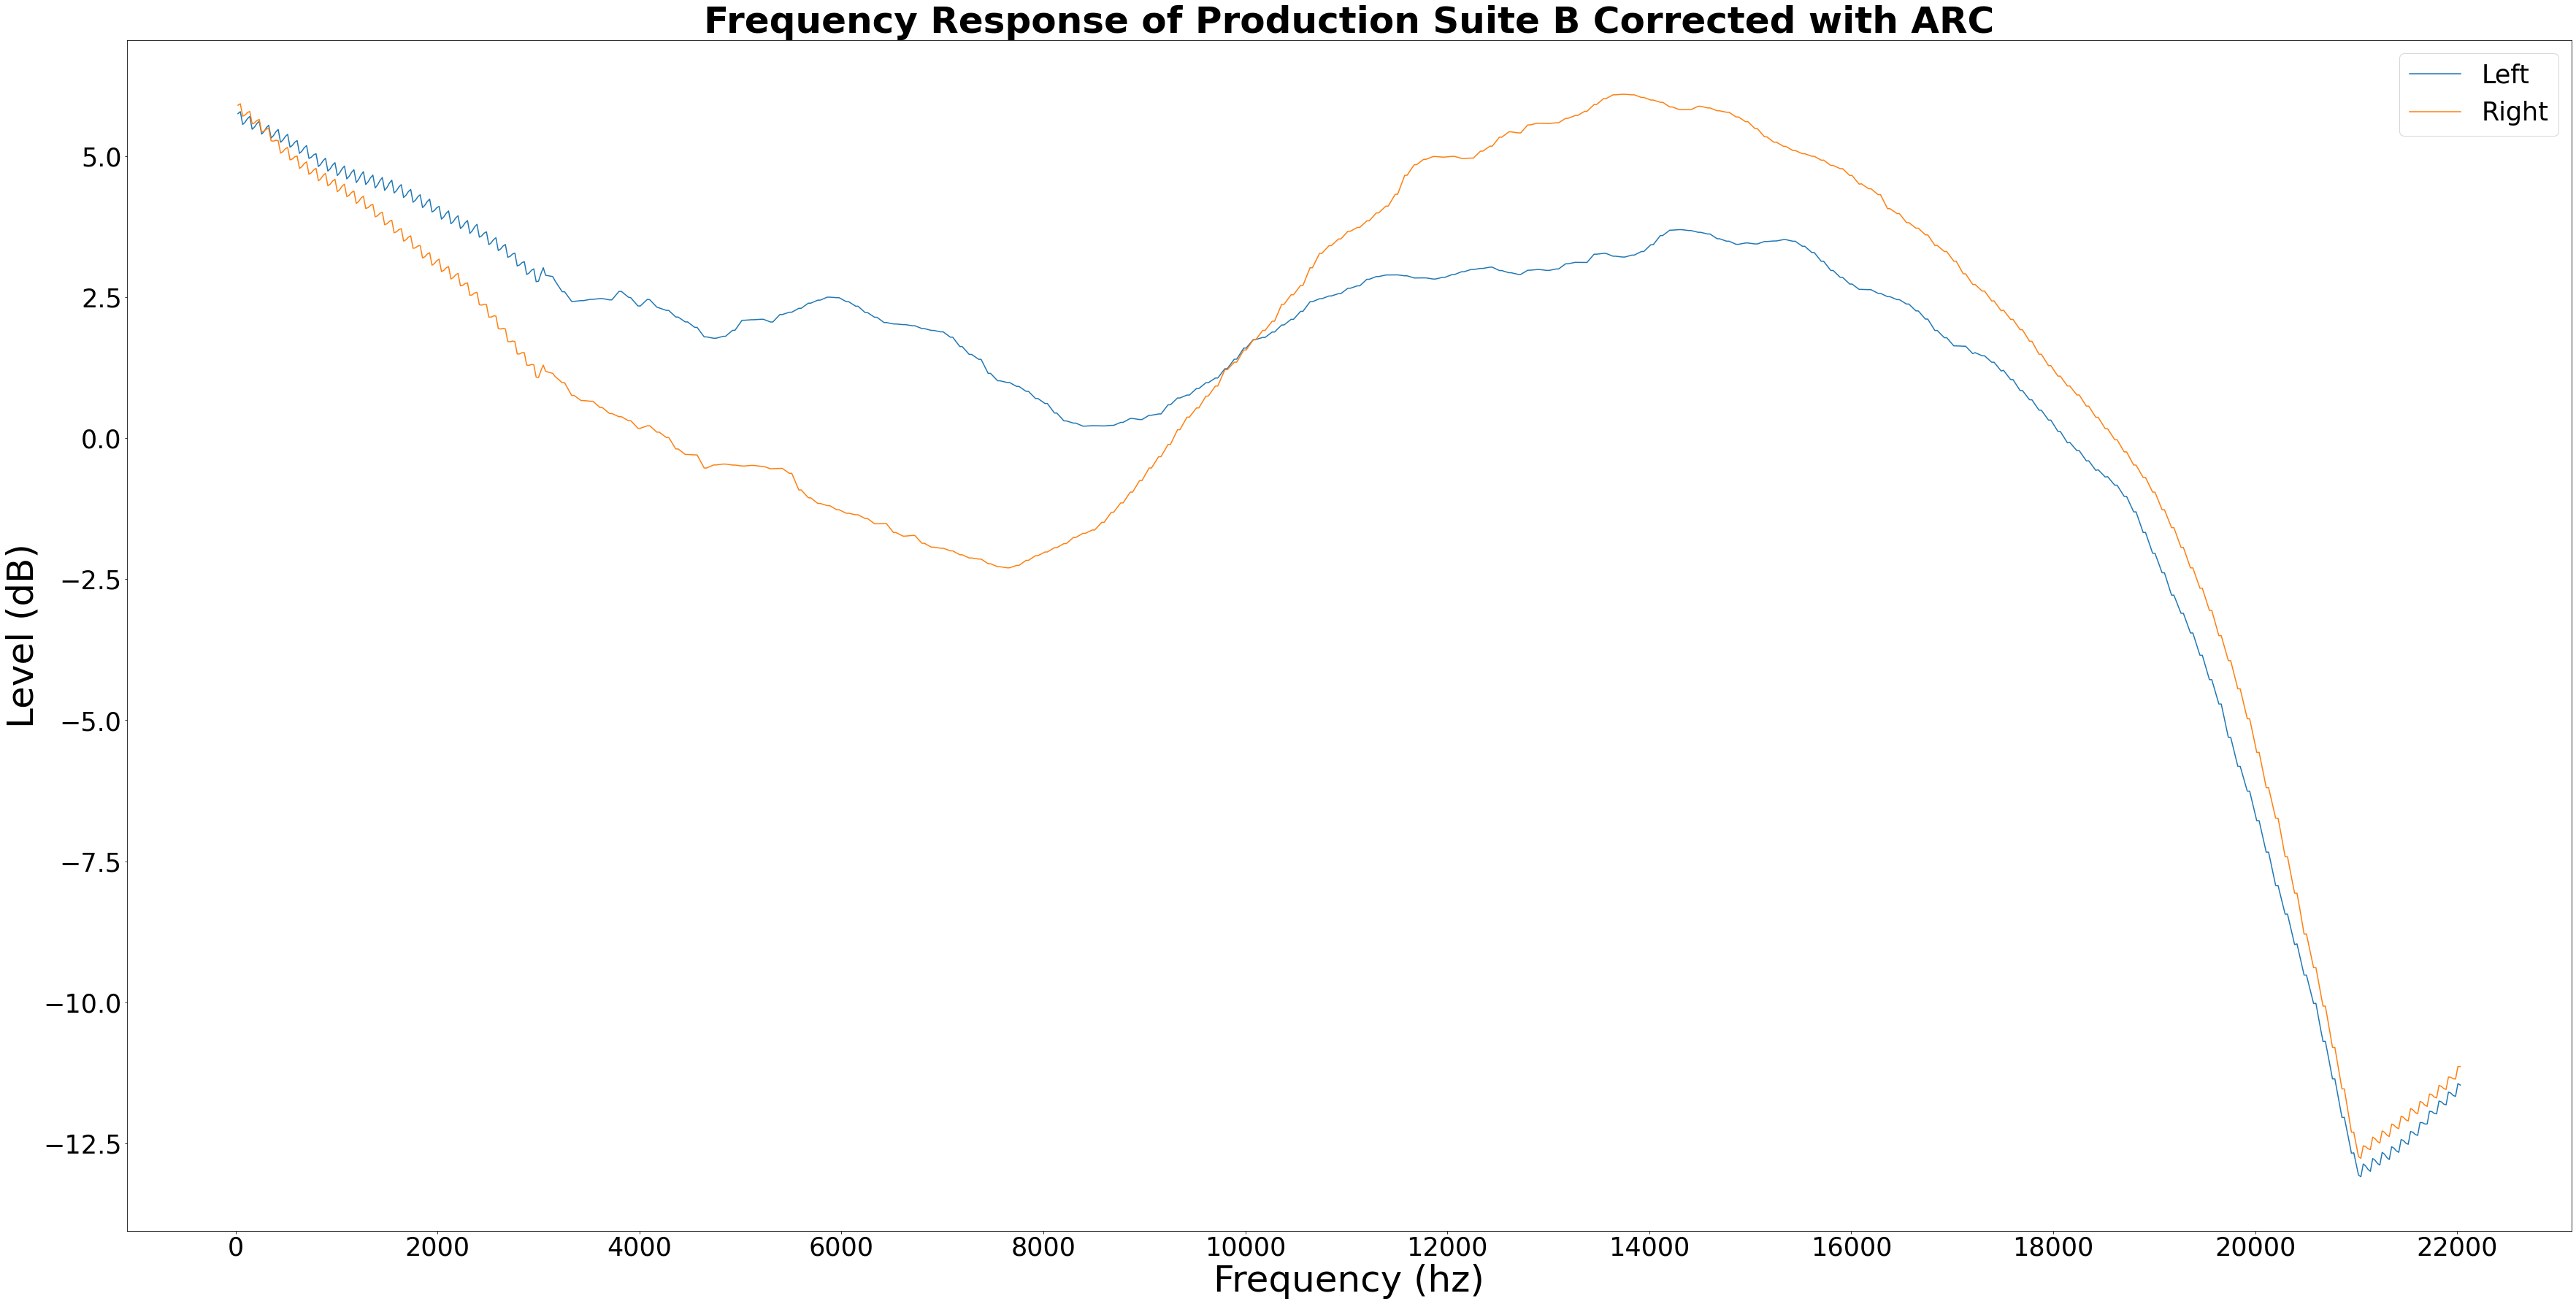

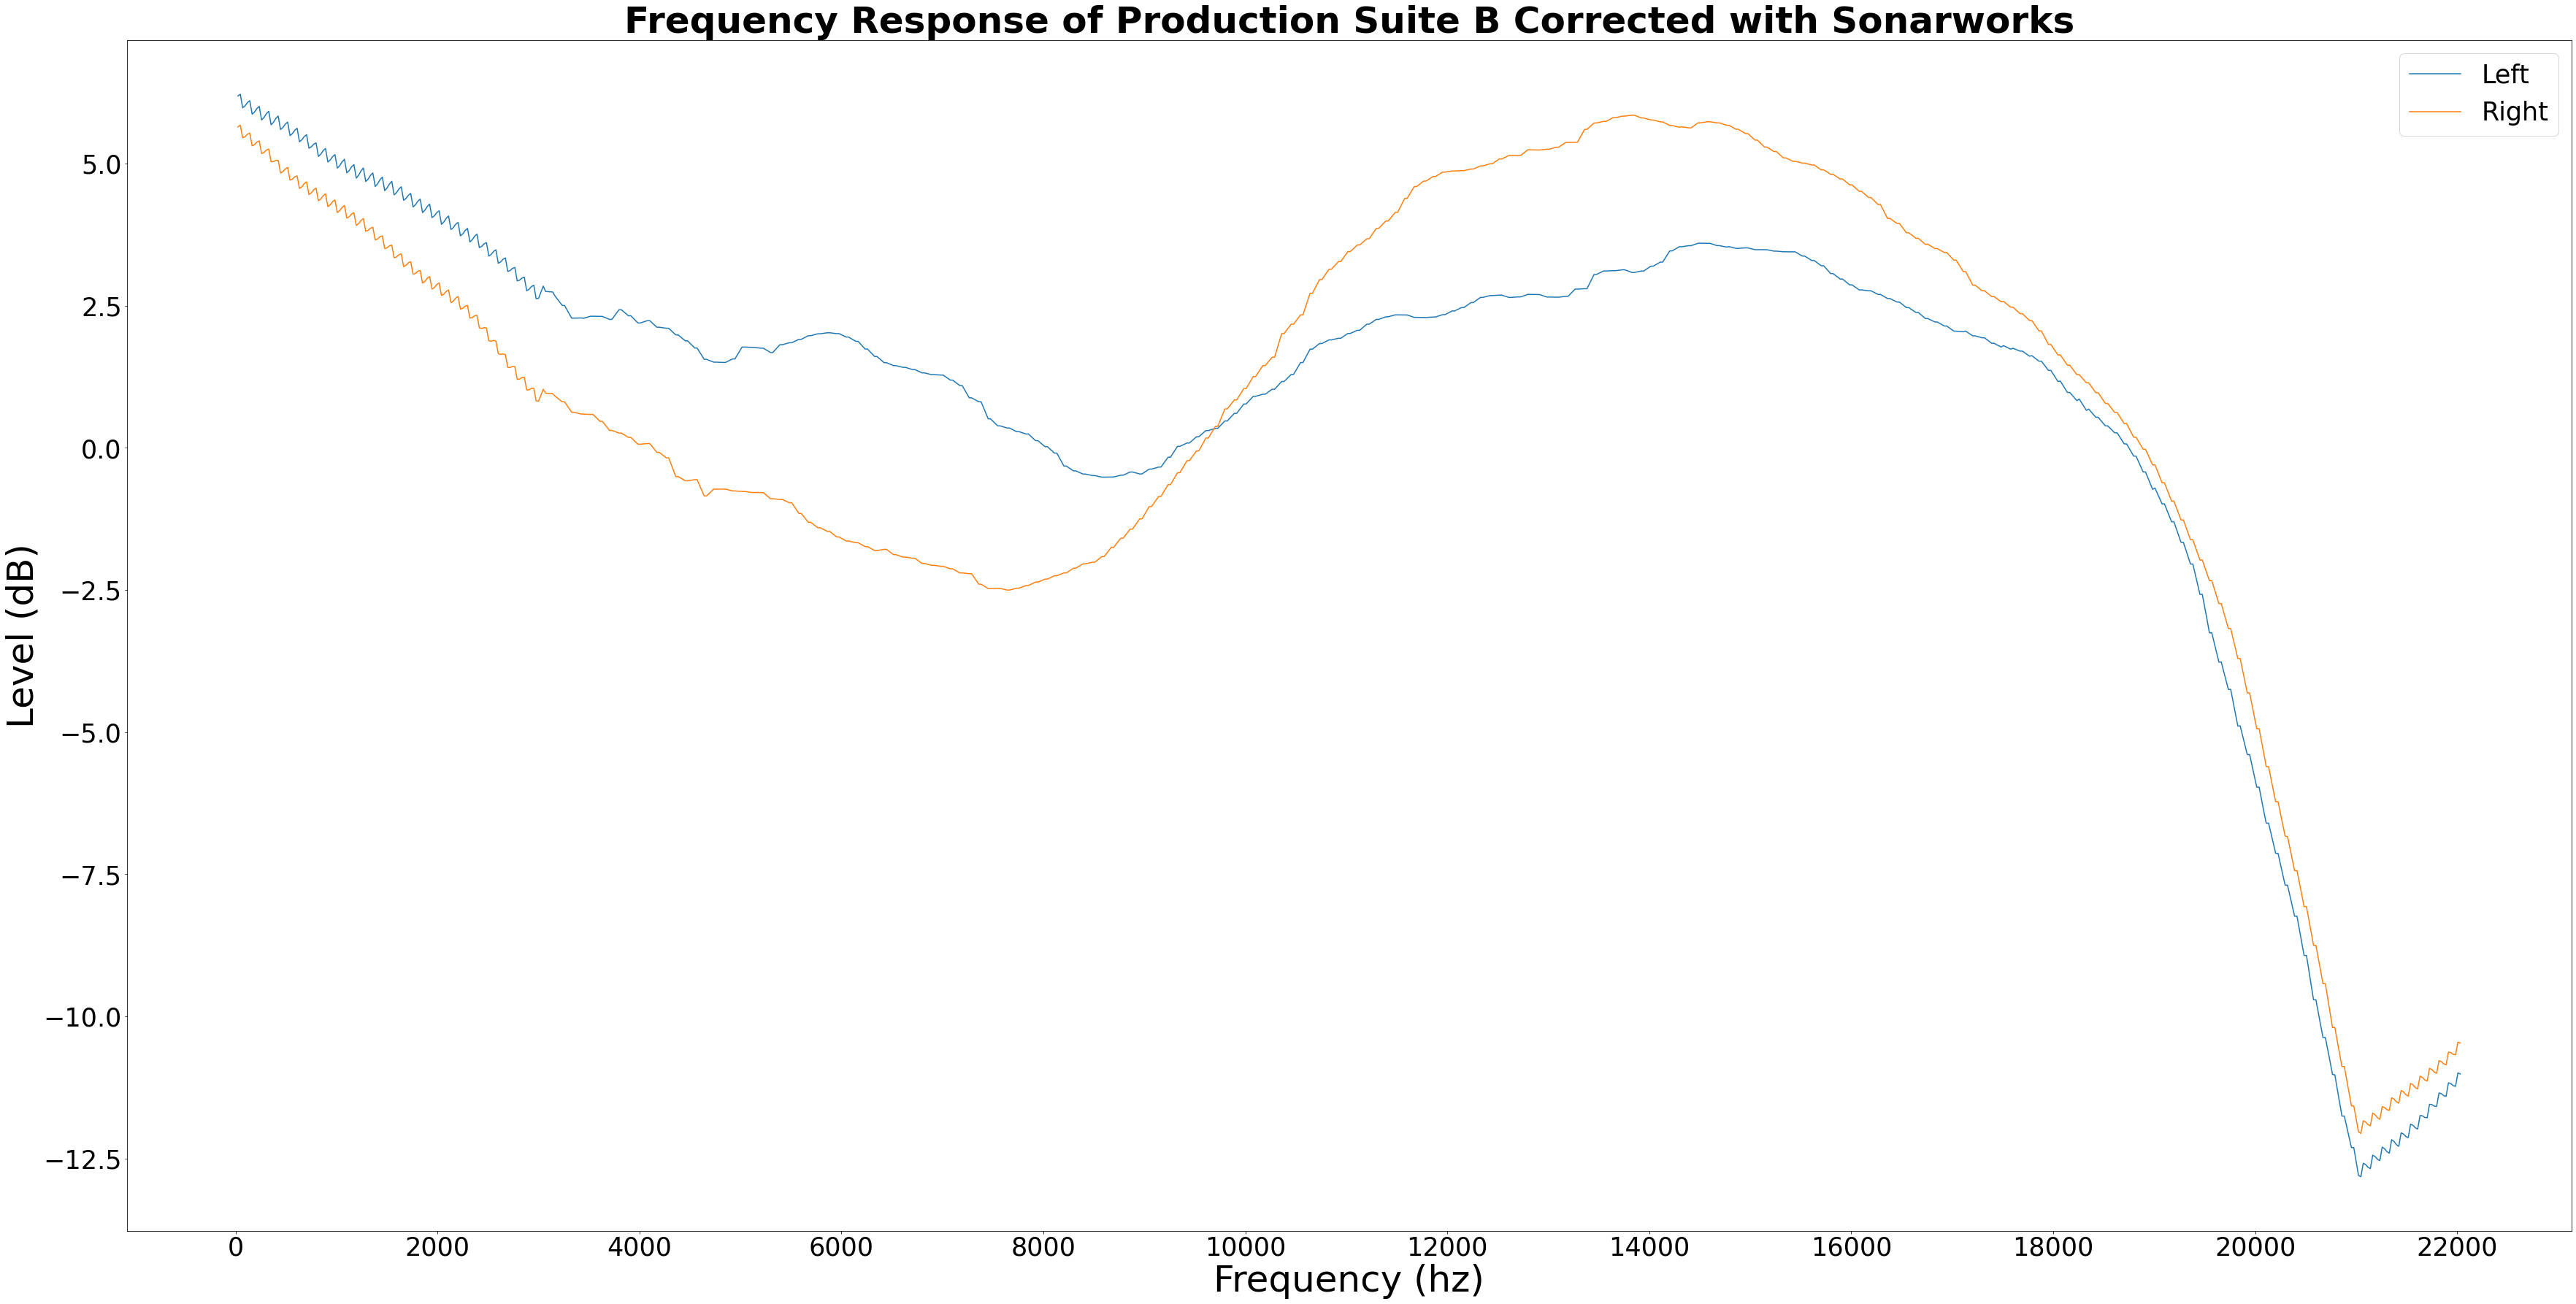

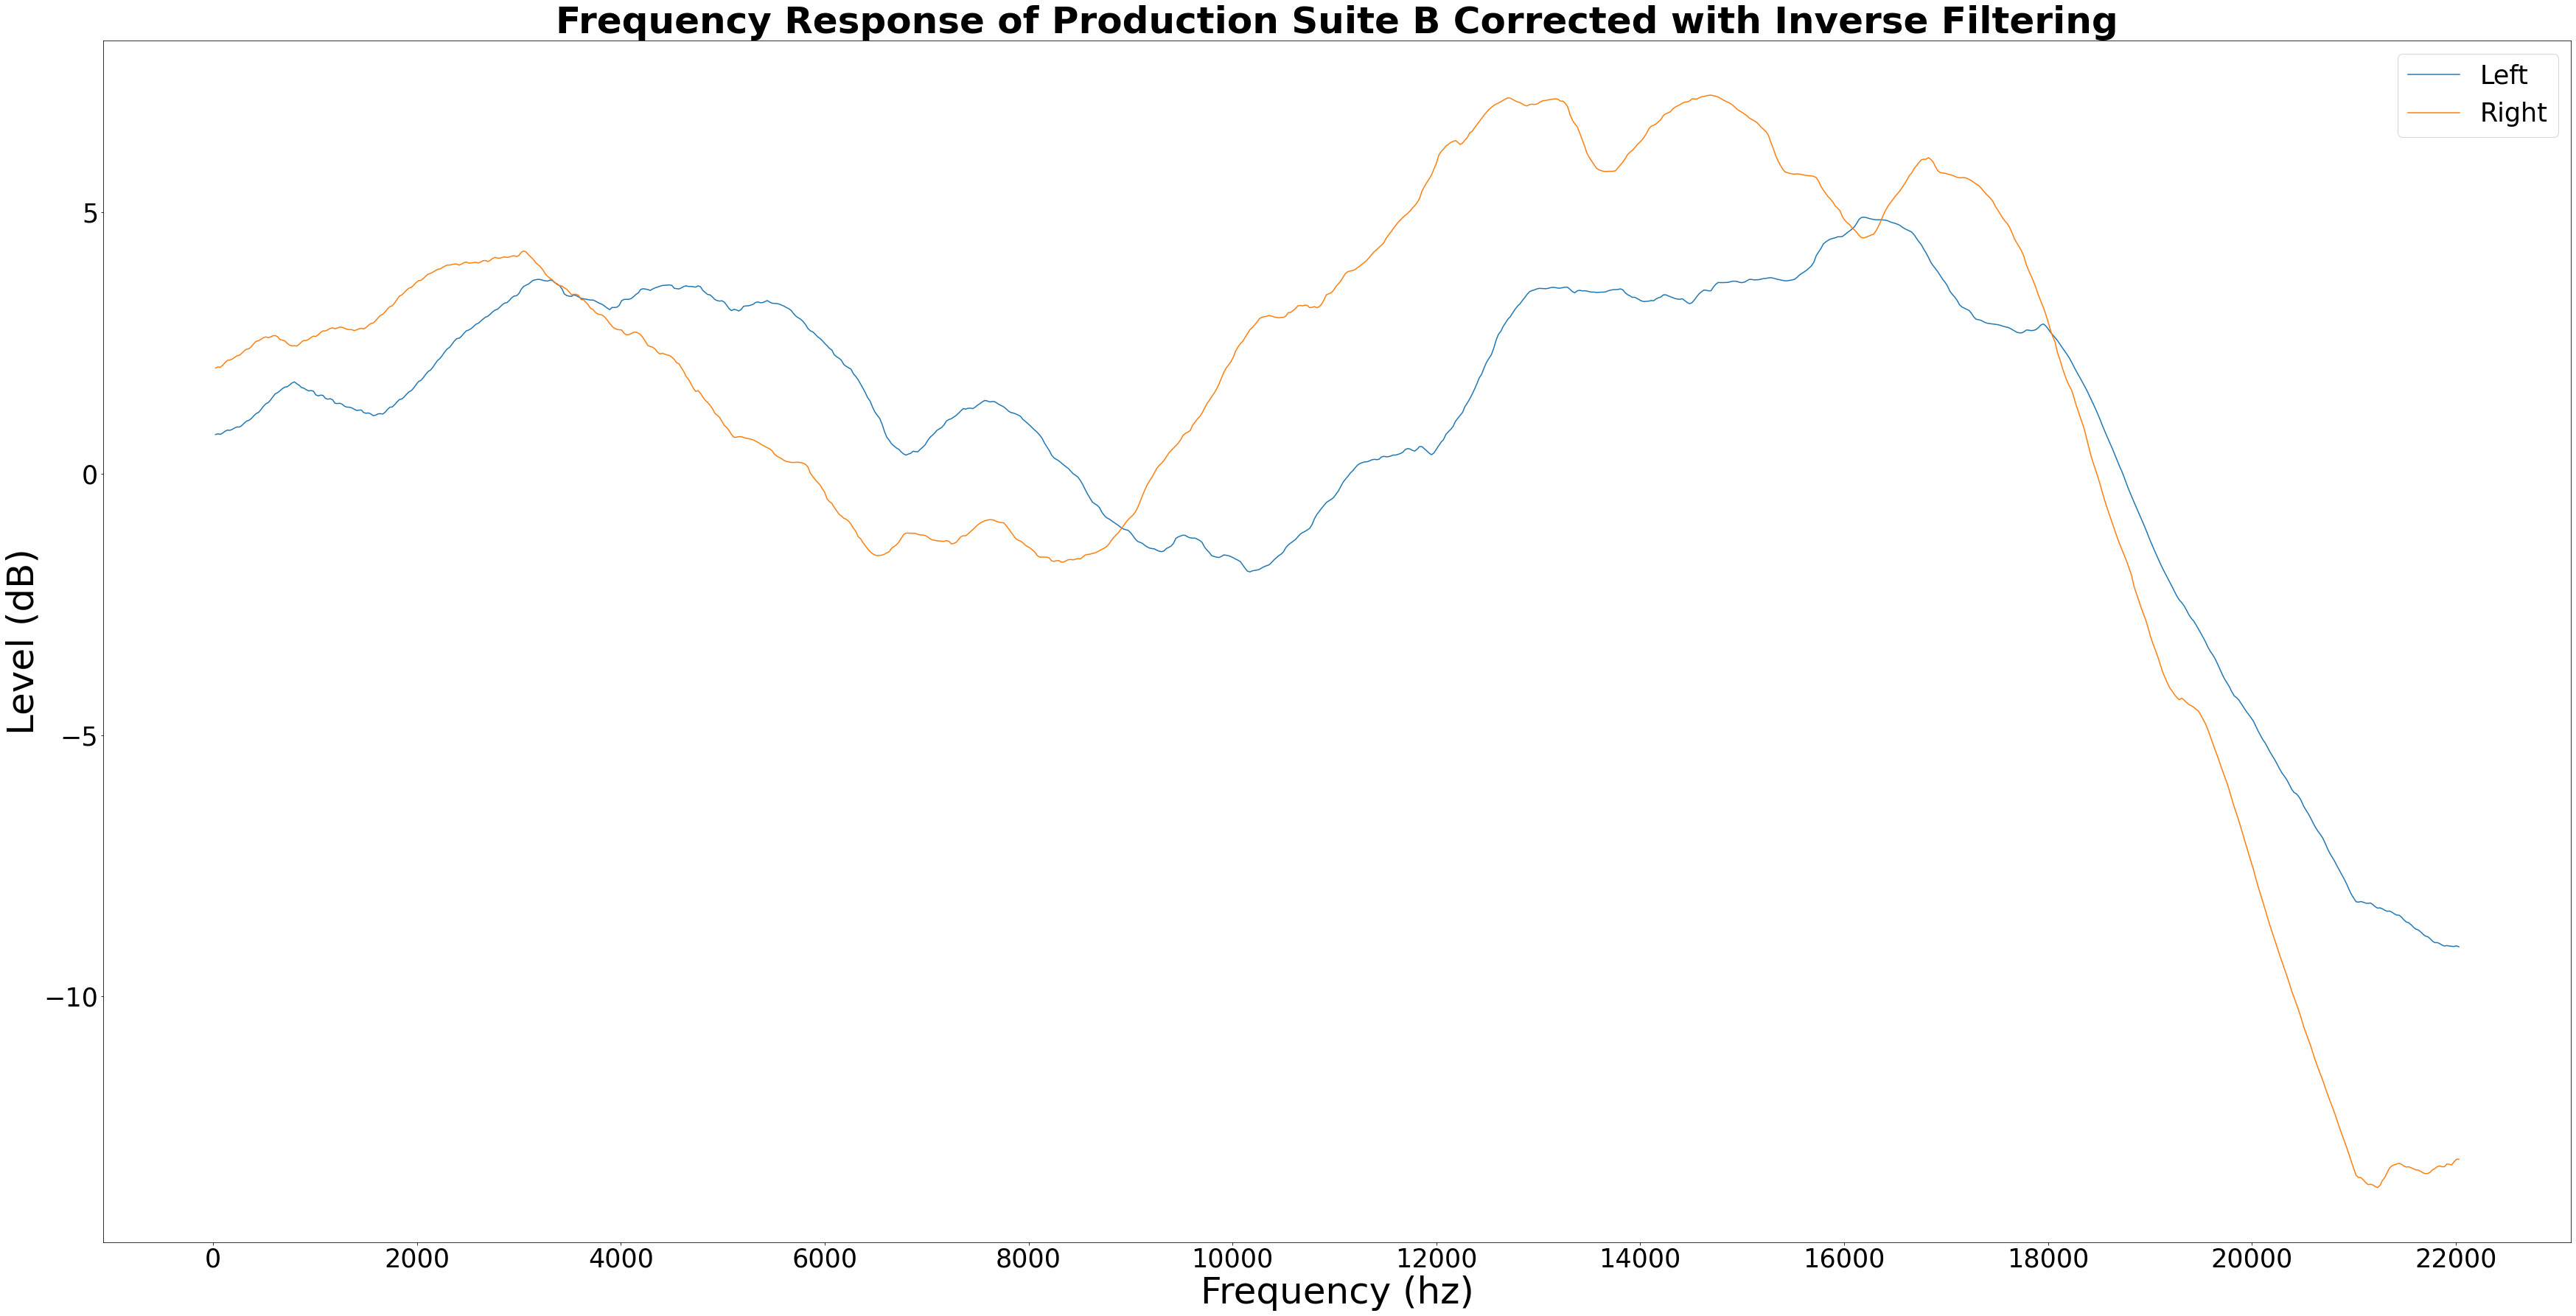

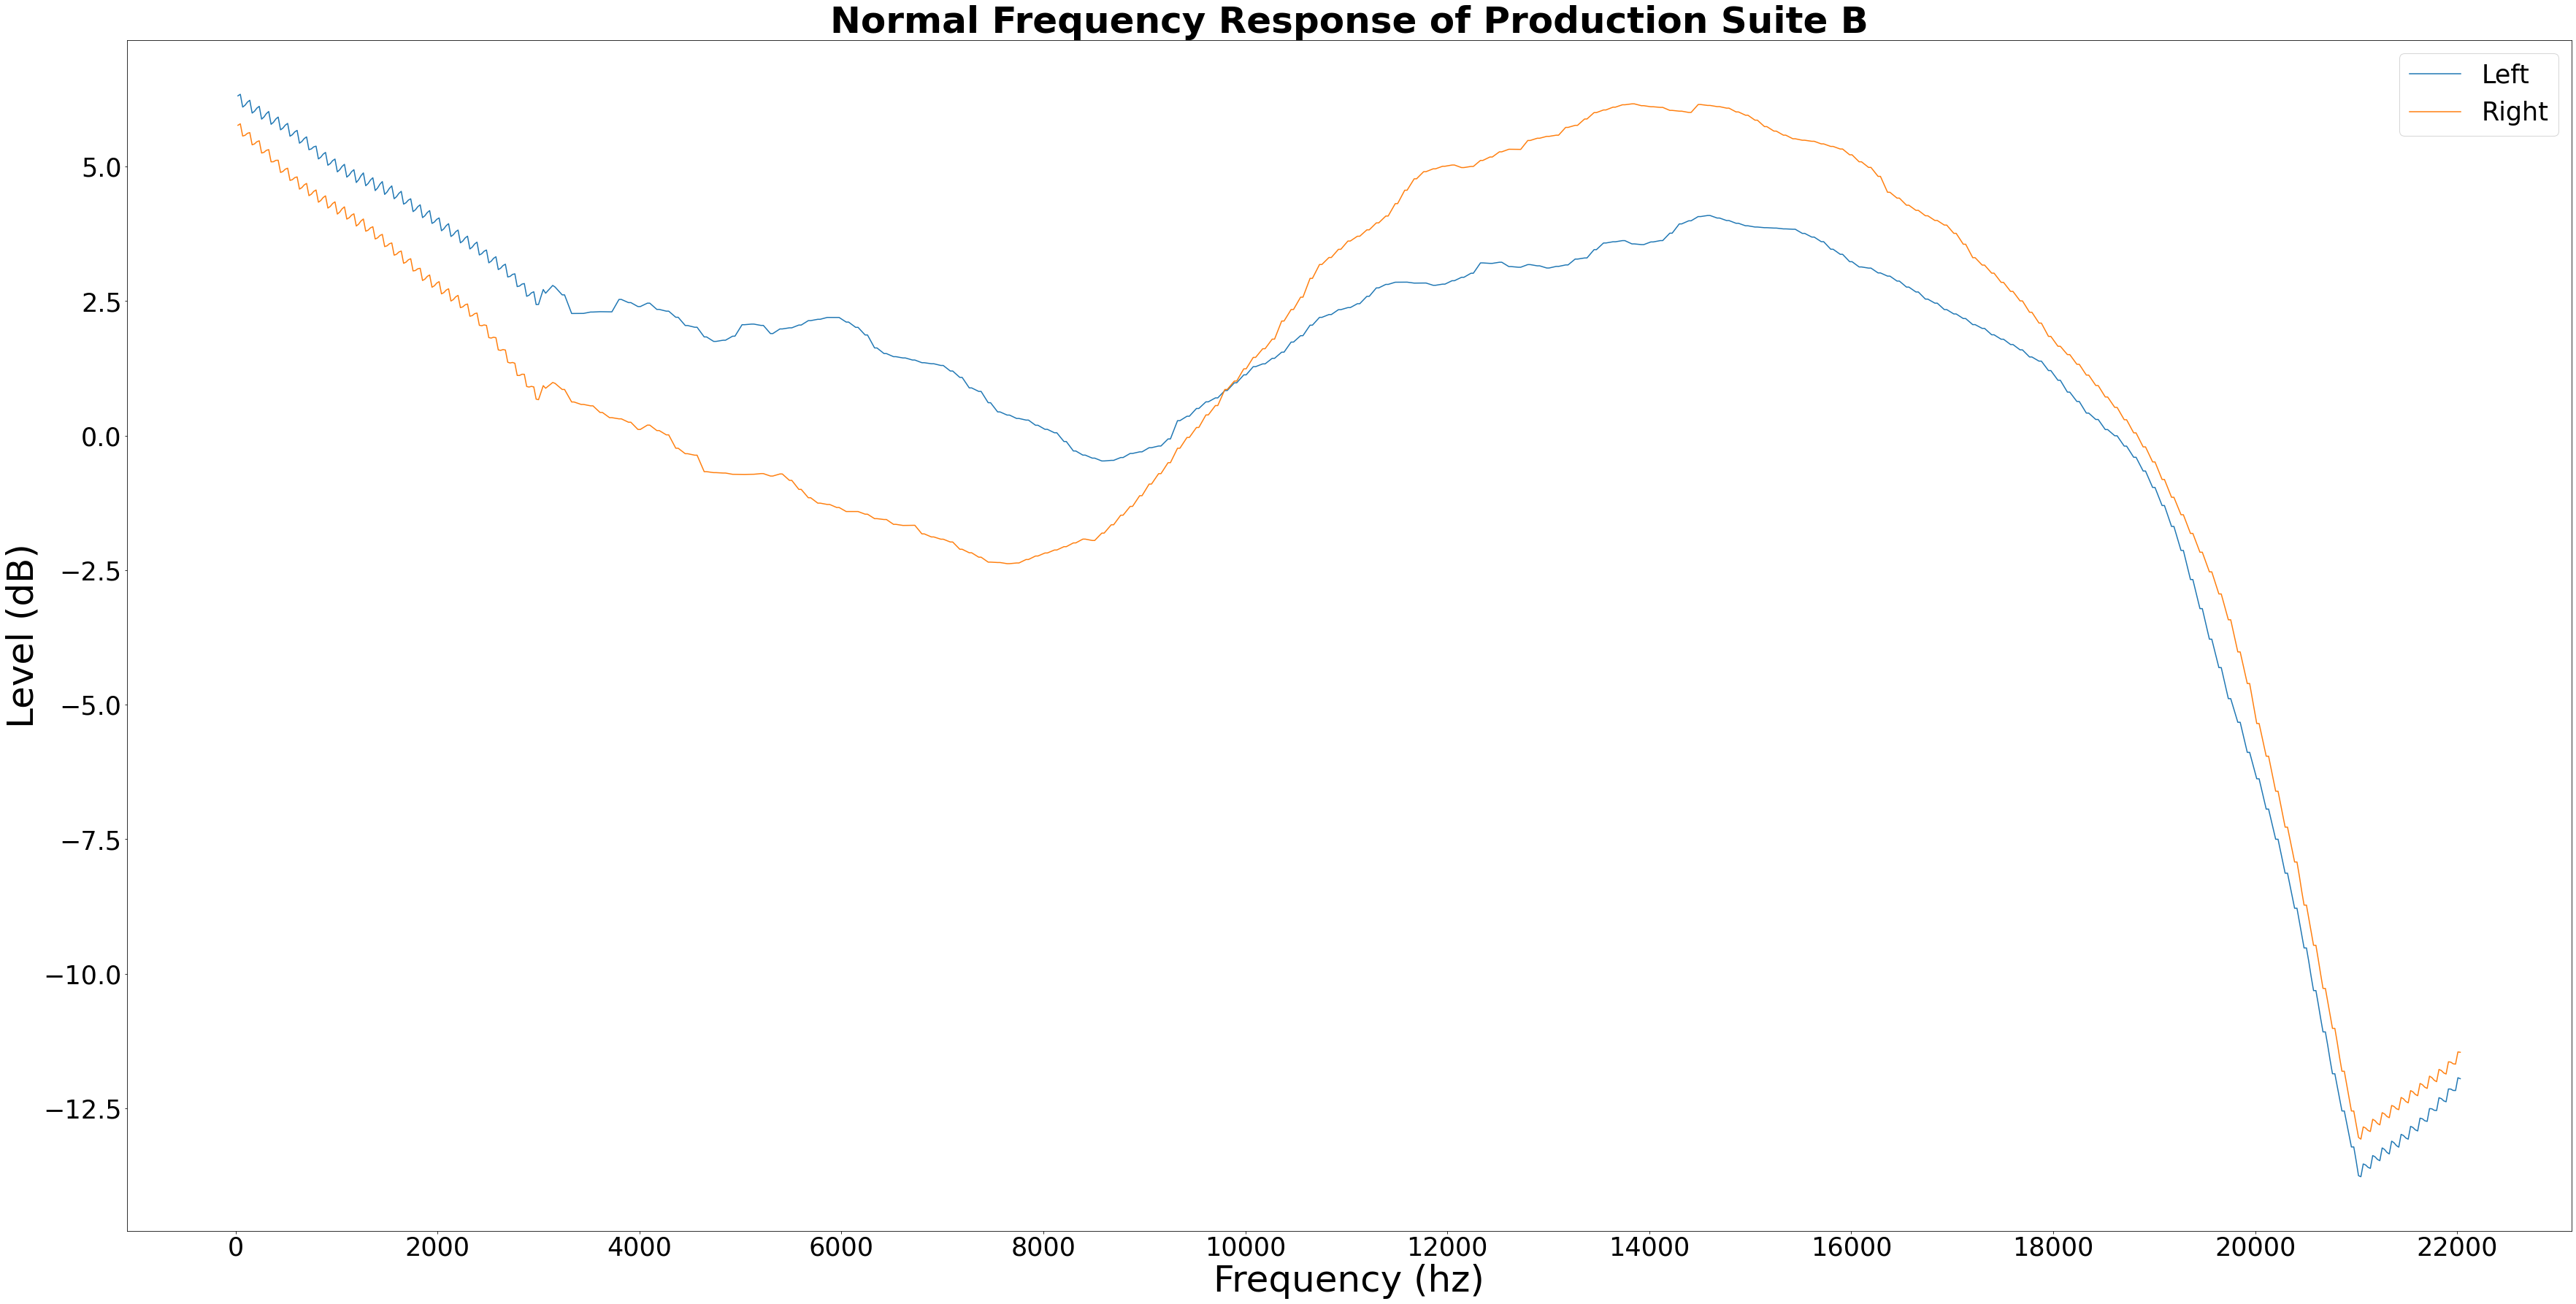

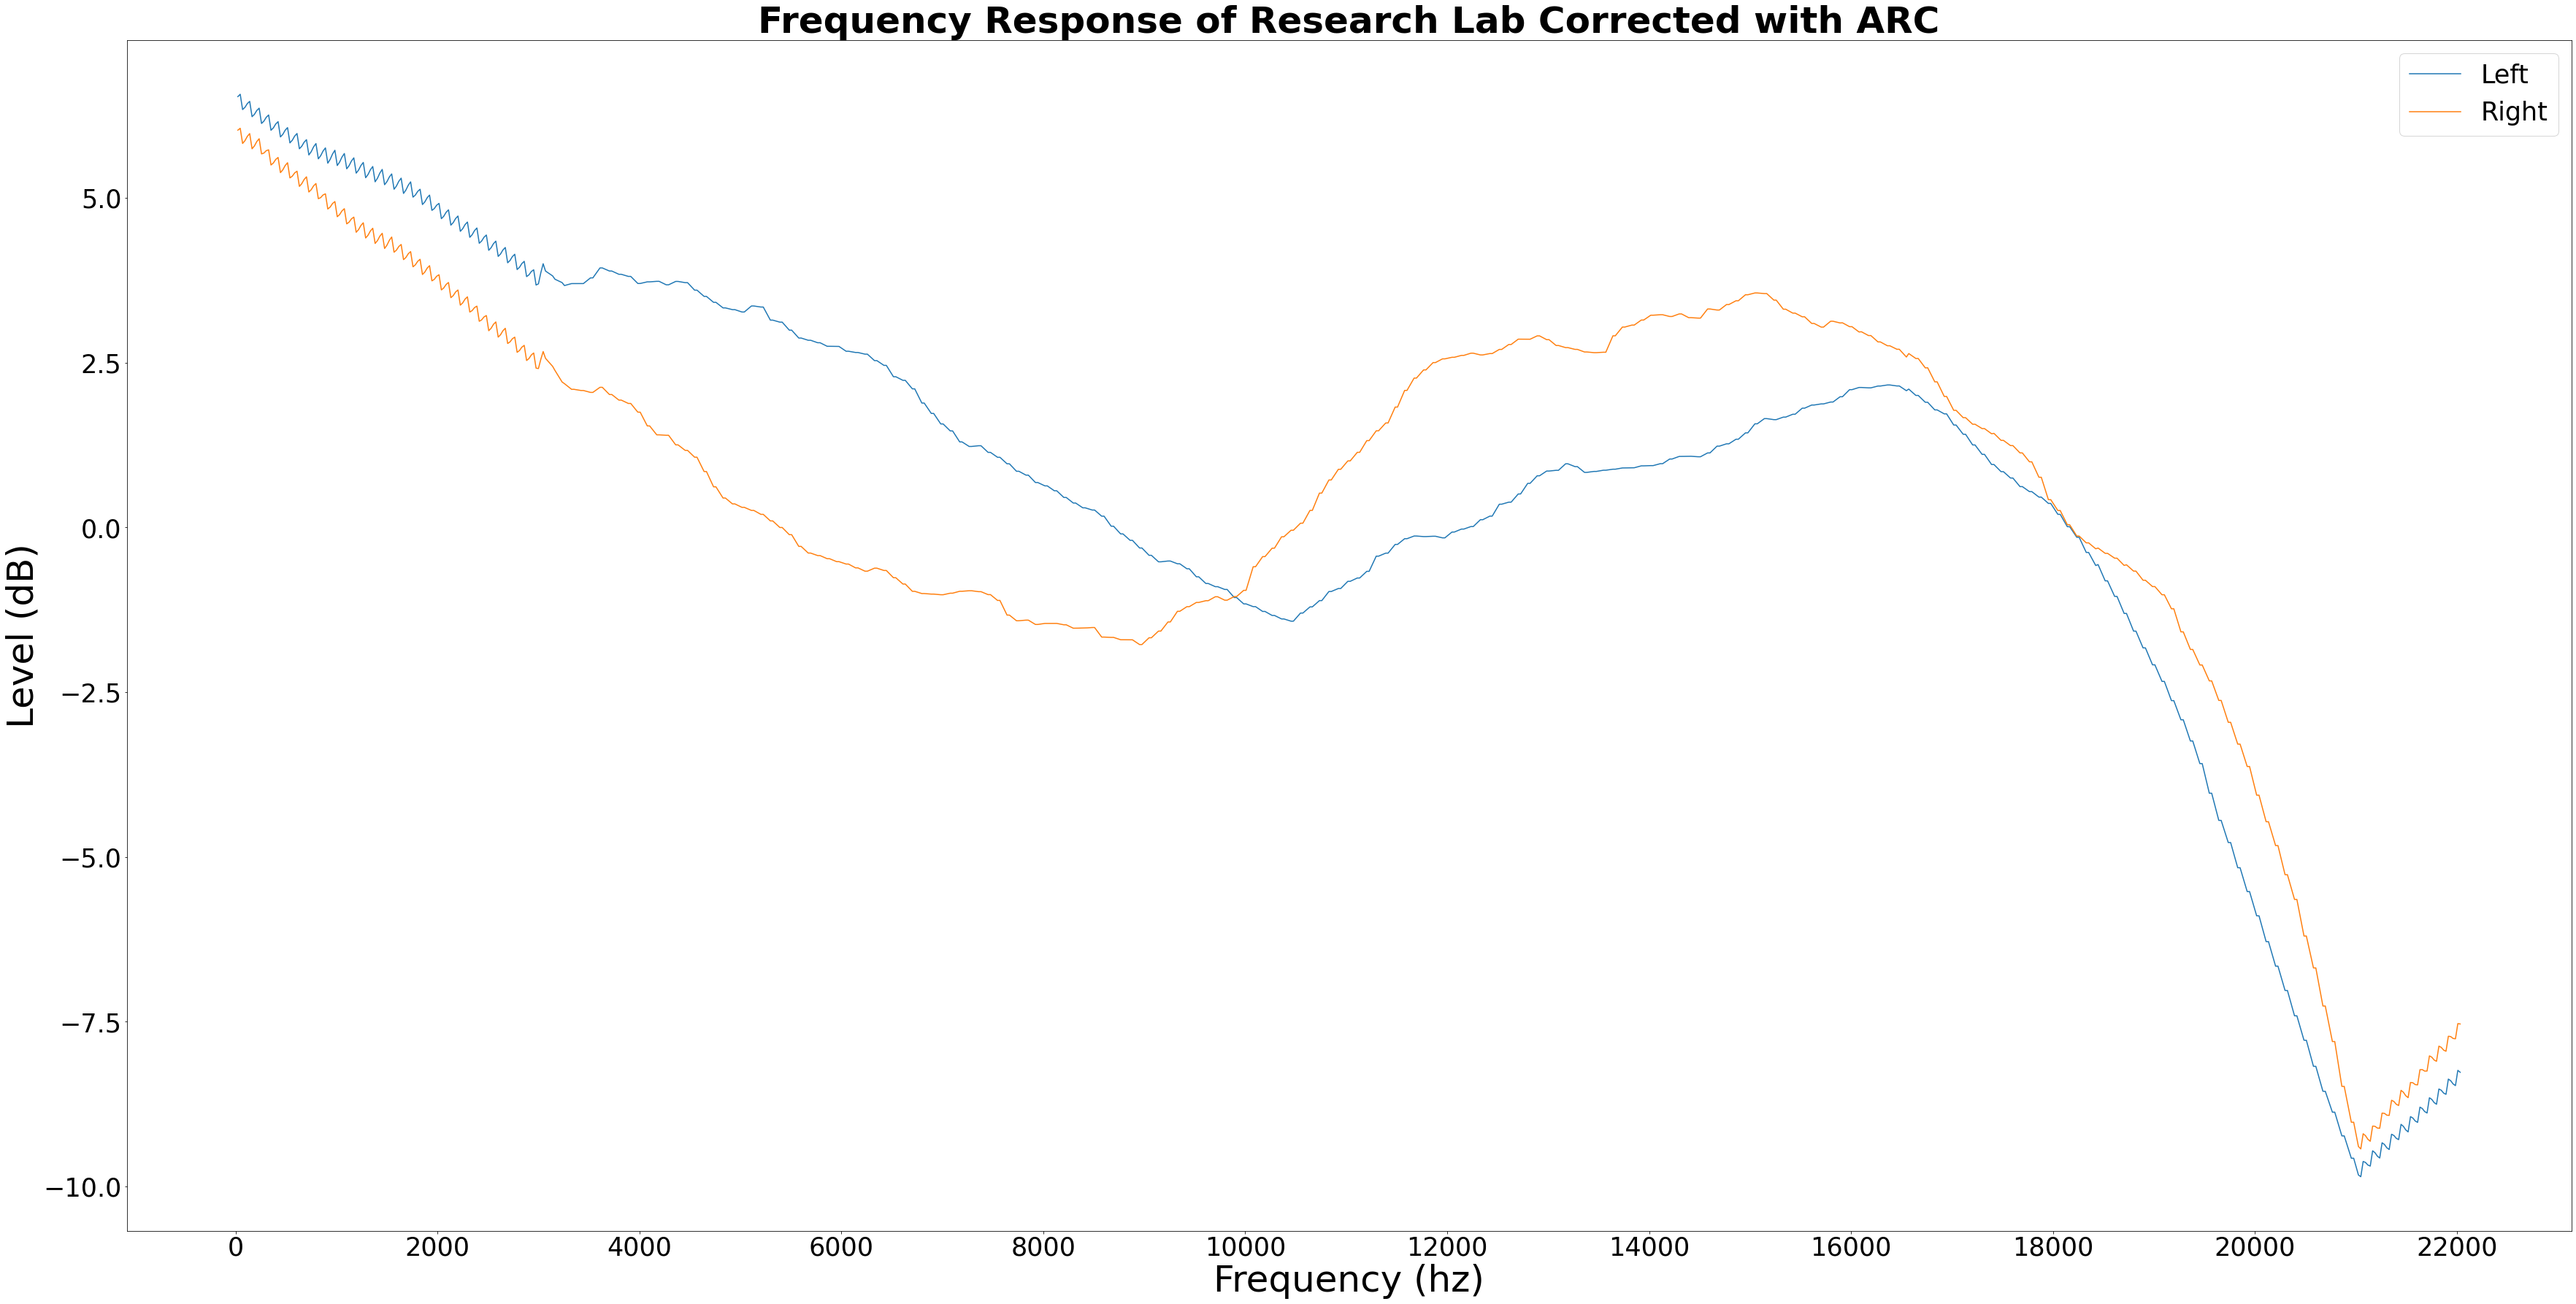

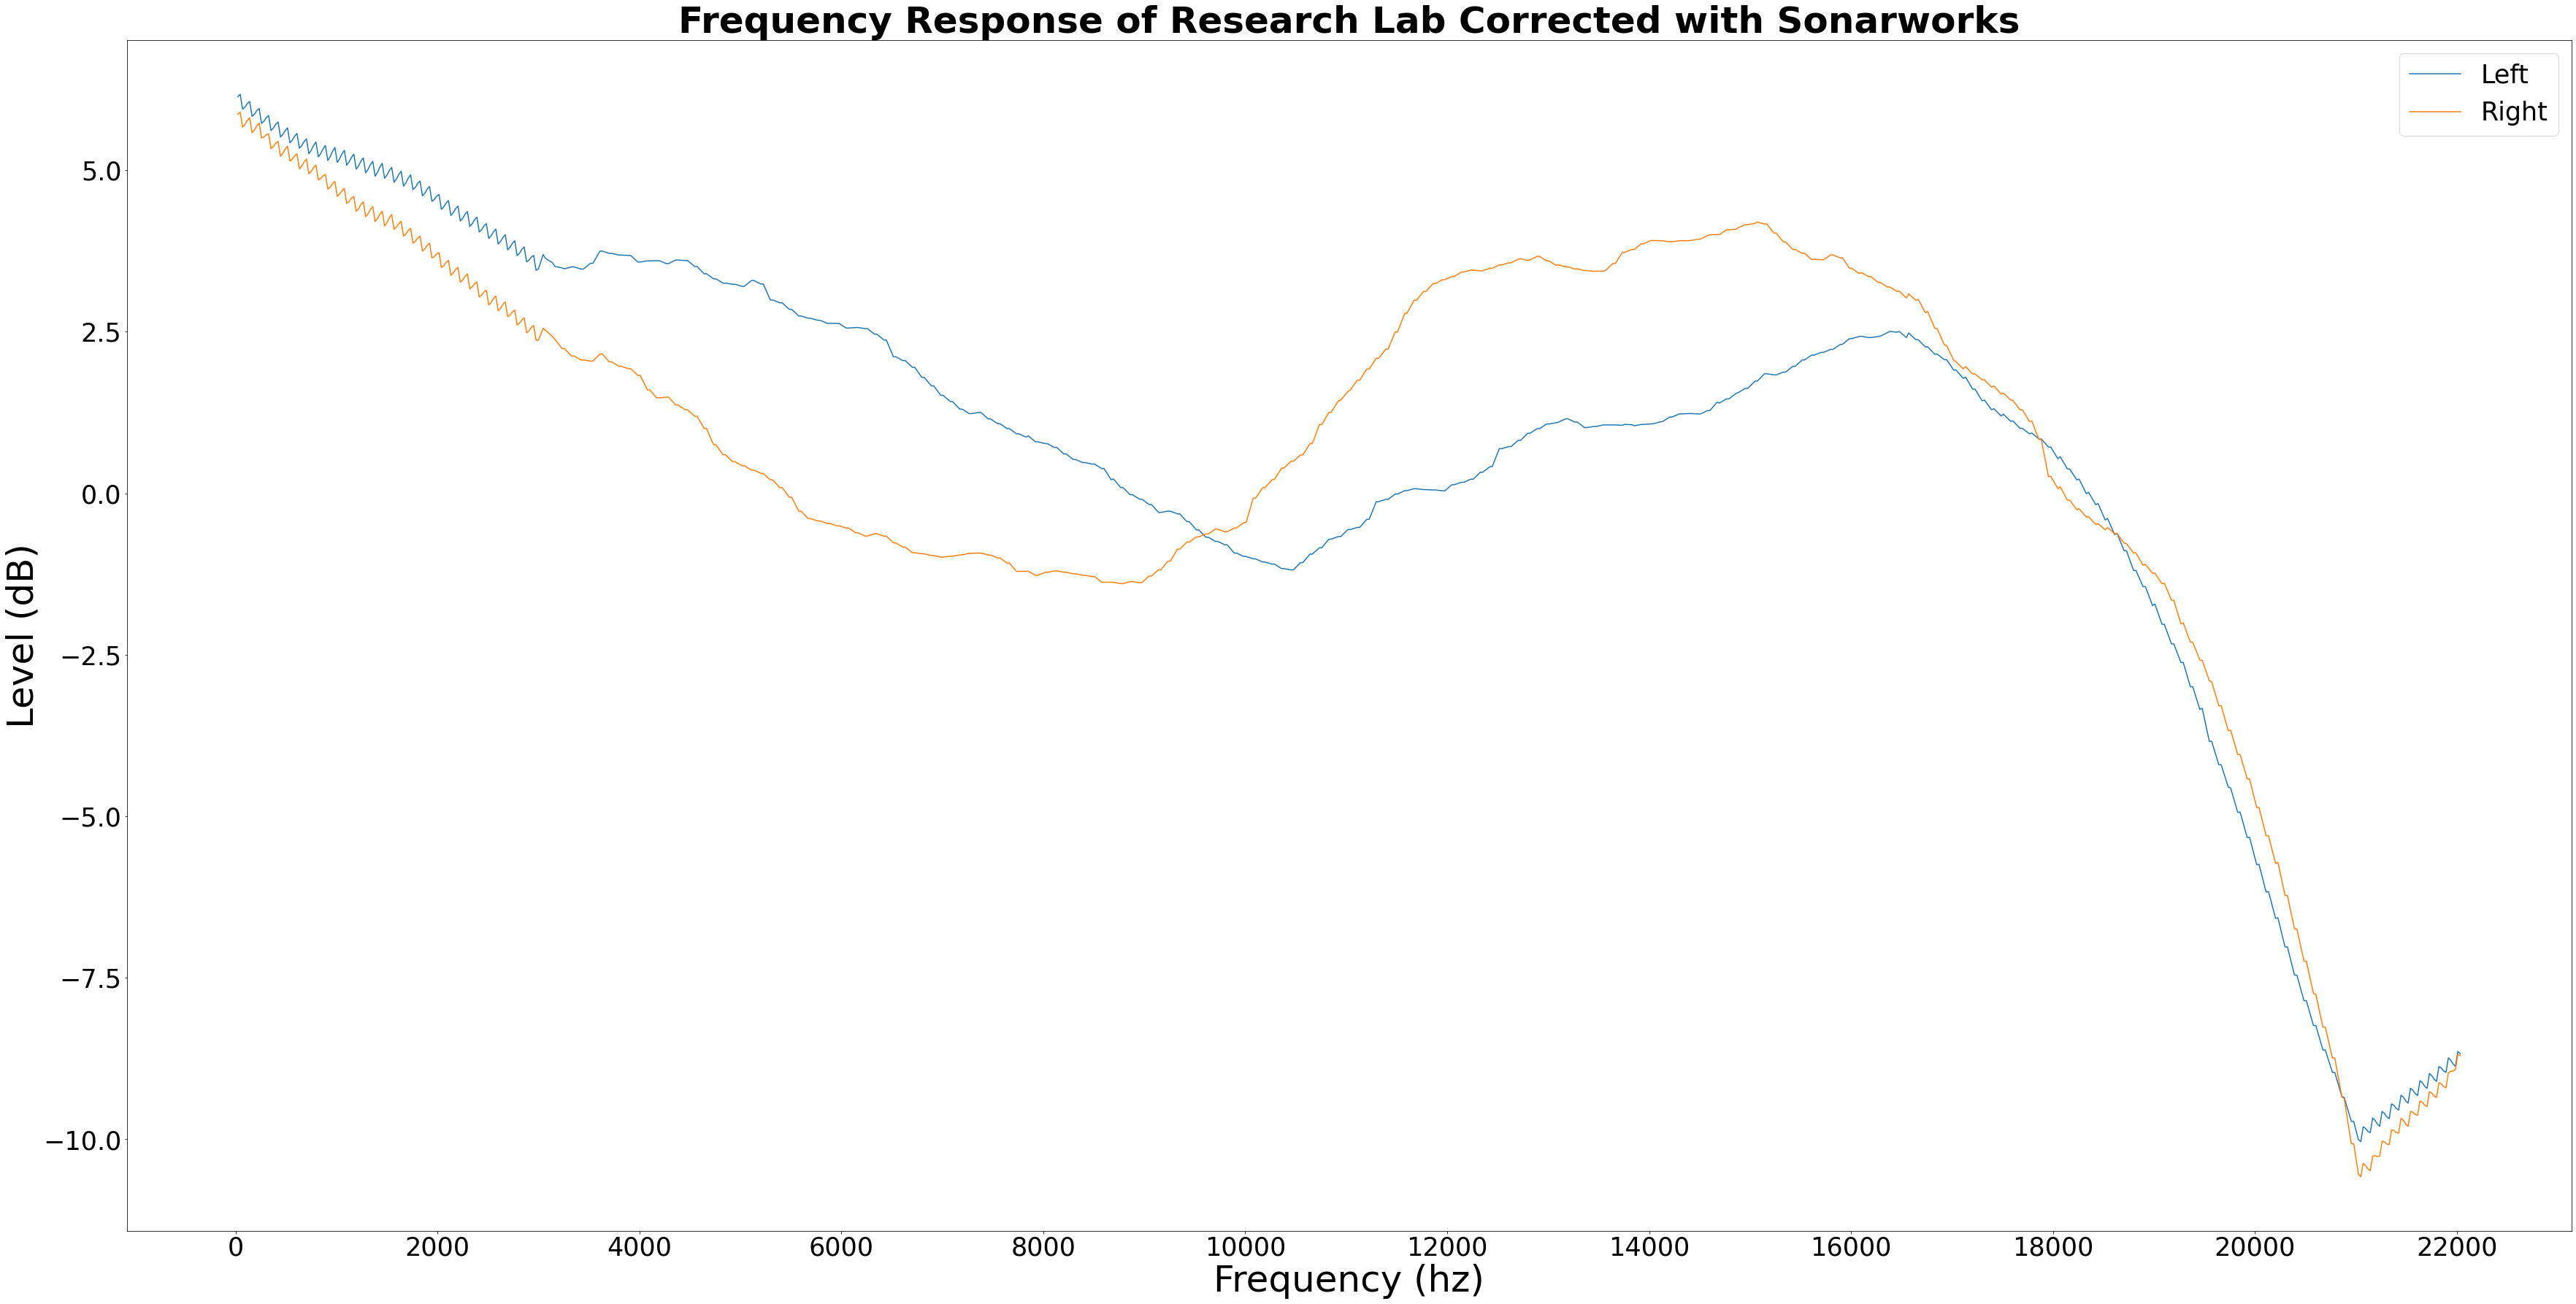

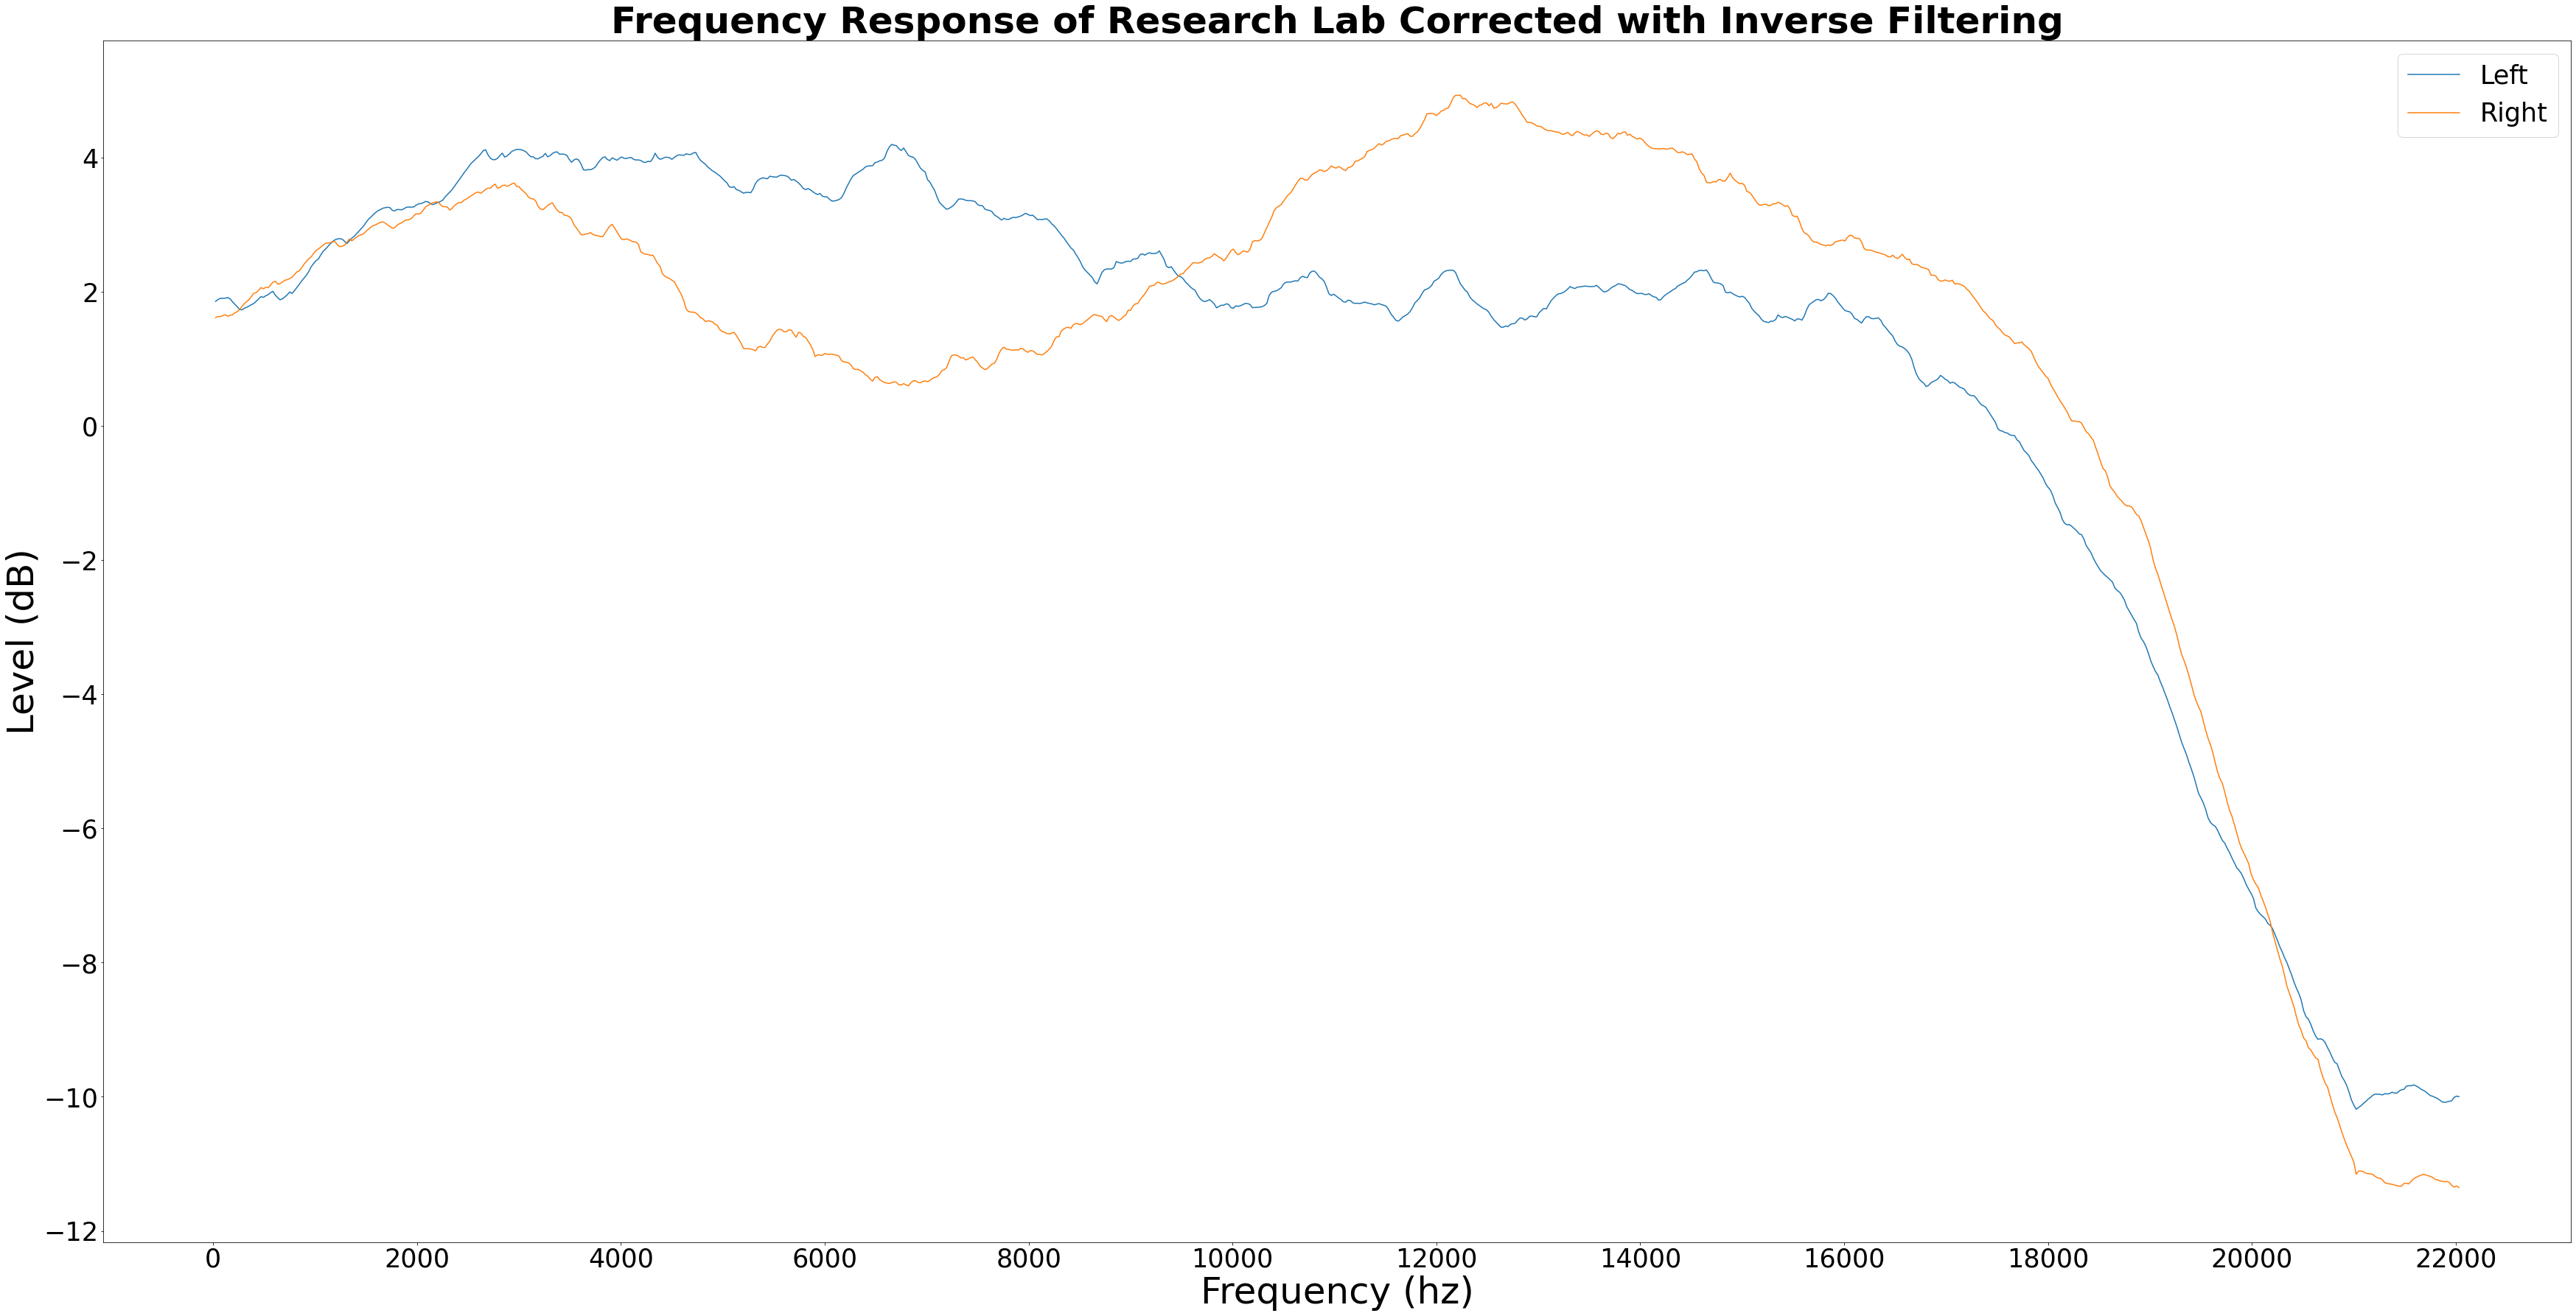

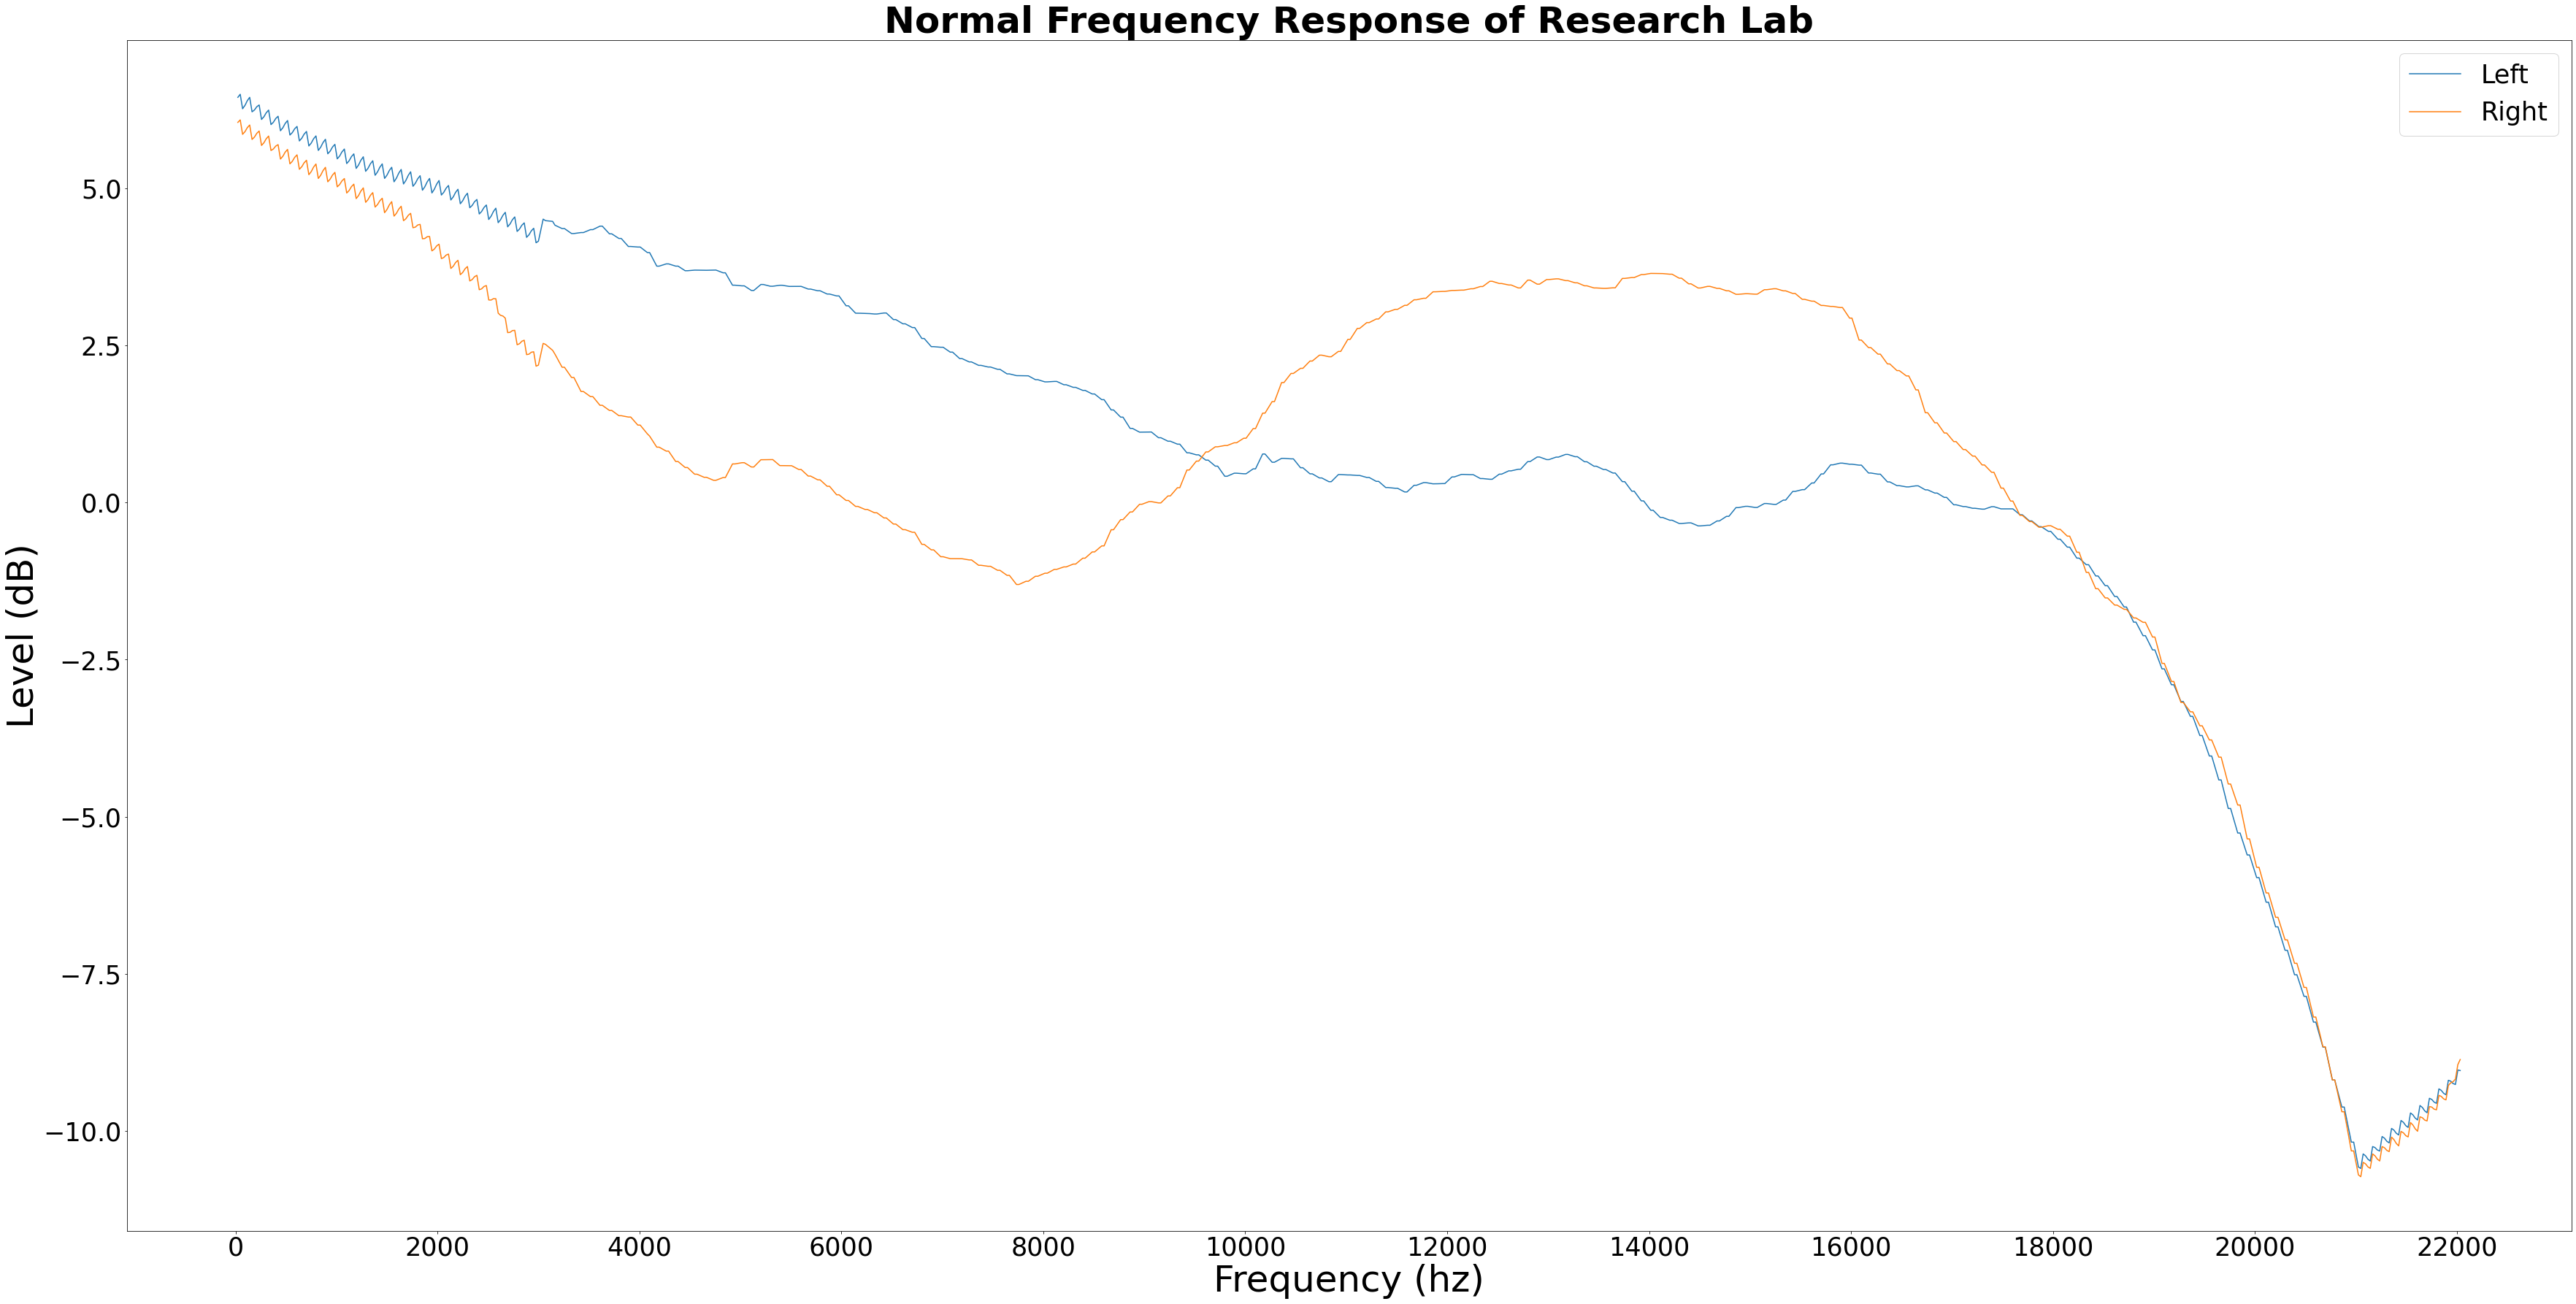

In [14]:
plot_IR('EDIT-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Edit Suite 4 Corrected with ARC')
plot_IR('EDIT-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Edit Suite 4 Corrected with Sonarworks')
plot_IR('EDIT-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Edit Suite 4 Corrected with Inverse Filtering')
plot_IR('EDIT-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Normal Frequency Response of Edit Suite 4')
 
plot_IR('PROD-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Production Suite B Corrected with ARC')
plot_IR('PROD-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Production Suite B Corrected with Sonarworks')
plot_IR('PROD-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Production Suite B Corrected with Inverse Filtering')
plot_IR('PROD-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Normal Frequency Response of Production Suite B')
 
plot_IR('RLAB-ARC-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Research Lab Corrected with ARC')
plot_IR('RLAB-Sonarworks-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Research Lab Corrected with Sonarworks')
plot_IR('RLAB-Inverse-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Frequency Response of Research Lab Corrected with Inverse Filtering')
plot_IR('RLAB-Normal-Convolved-Sweep-NORMALIZED-DECONVOLVED.wav','Normal Frequency Response of Research Lab')